In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
import itertools
from sklearn.metrics import mean_squared_error
import gc
import seaborn as sns
import math
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
from plotly.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
#reading dataframe
df = pd.read_csv('/home/abhishek/projects/carsalesprediction/newcarsalesnorway/norway_new_car_sales_by_make.csv')

In [3]:
#assinging value to cols , which we might not need them 
cols = ['Year' ,'Month', 'Pct']

In [4]:
#merging month and year as string 
df['date'] = df.Year.astype(str).str.cat(df.Month.astype(str), sep='-')

In [5]:
#dropping the assigned columns
df = df.drop(cols, axis=1)

In [6]:
#dROPPING NULL ENTRIES 
df.dropna(inplace=True)

In [7]:
#checking data types 
df.dtypes

Make        object
Quantity     int64
date        object
dtype: object

In [8]:
#converting into date format which is important to form prediction
df['date'] = pd.to_datetime(df['date'])

In [9]:
df

Make  Quantity       date
0            Toyota      2884 2007-01-01
1        Volkswagen      2521 2007-01-01
2           Peugeot      1029 2007-01-01
3              Ford       870 2007-01-01
4             Volvo       693 2007-01-01
5             Skoda       665 2007-01-01
6              Opel       622 2007-01-01
7              Audi       599 2007-01-01
8             Honda       423 2007-01-01
9     Mercedes-Benz       362 2007-01-01
10              BMW       352 2007-01-01
11          Citroen       263 2007-01-01
12           Suzuki       258 2007-01-01
13            Mazda       191 2007-01-01
14             Saab       169 2007-01-01
15          Renault       168 2007-01-01
16       Mitsubishi       136 2007-01-01
17           Nissan       127 2007-01-01
18          Hyundai        97 2007-01-01
19              Kia        55 2007-01-01
20            Dodge        33 2007-01-01
21             MINI        26 2007-01-01
22           Subaru        26 2007-01-01
23            Lexus        22 2007-01-01
24        Chevrolet        20 2007-01-01
25       Alfa Romeo        16 2007-01-01
26         Daihatsu        15 2007-01-01
27       Land Rover        14 2007-01-01
28             Fiat         9 2007-01-01
29         Chrysler         4 2007-01-01
...             ...       ...        ...
4347          Skoda       681 2017-01-01
4348           Ford       617 2017-01-01
4349         Nissan       615 2017-01-01
4350        Peugeot       571 2017-01-01
4351           Audi       565 2017-01-01
4352            Kia       422 2017-01-01
4353          Tesla       367 2017-01-01
4354         Suzuki       352 2017-01-01
4355        Hyundai       349 2017-01-01
4356        Renault       306 2017-01-01
4357          Mazda       284 2017-01-01
4358     Mitsubishi       216 2017-01-01
4359           Opel       191 2017-01-01
4360        Citroen       163 2017-01-01
4361          Honda       101 2017-01-01
4362          Lexus        98 2017-01-01
4363        Porsche        91 2017-01-01
4364           MINI        65 2017-01-01
4365         Subaru        39 2017-01-01
4366         Jaguar        27 2017-01-01
4367     Land Rover        18 2017-01-01
4368          Dacia         9 2017-01-01
4369             DS         9 2017-01-01
4370     Alfa Romeo         6 2017-01-01
4371           Fiat         3 2017-01-01
4372        Nilsson         3 2017-01-01
4373       Maserati         2 2017-01-01
4374        Ferrari         1 2017-01-01
4375          Smart         1 2017-01-01
4376      Ssangyong         1 2017-01-01

[4367 rows x 3 columns]

In [11]:
makes =  df.Make.value_counts().index

In [17]:
import matplotlib.pyplot as plt
for x in makes :
    print('the prediction for',x)
    dfx = df[df.Make.str.contains(x)]
    dfx = dfx.drop('Make',axis =1)
    dfx = dfx.groupby(['date'])['Quantity'].sum()
    series = dfx
    X = series.values
    size = int(len(X) * 0.66)
    train, test = X[0:size], X[size:len(X)]
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=(1,1,1))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
    error = mean_squared_error(test, predictions)
    print('Test MSE: %.3f' % error)
    # plot
   # pyplot.plot(test)
   # pyplot.plot(predictions, color='red')
   # pyplot.show()

('the prediction for', 'Lexus')
predicted=41.405628, expected=69.000000
predicted=49.174817, expected=47.000000
predicted=46.245770, expected=68.000000
predicted=53.449285, expected=54.000000
predicted=52.493793, expected=13.000000
predicted=39.467921, expected=66.000000
predicted=50.600626, expected=47.000000
predicted=48.941909, expected=35.000000
predicted=45.930806, expected=43.000000
predicted=46.364281, expected=57.000000
predicted=49.582254, expected=39.000000
predicted=46.772987, expected=43.000000
predicted=46.732409, expected=53.000000
predicted=48.842583, expected=92.000000
predicted=59.853983, expected=123.000000
predicted=80.789253, expected=135.000000
predicted=96.835690, expected=59.000000
predicted=59.432612, expected=137.000000
predicted=105.866930, expected=106.000000
predicted=106.342876, expected=97.000000
predicted=103.416278, expected=74.000000
predicted=92.798807, expected=76.000000
predicted=88.620803, expected=109.000000
predicted=98.142801, expected=99.000000


predicted=585.373117, expected=679.000000
predicted=627.980605, expected=635.000000
predicted=624.311298, expected=713.000000
predicted=670.457580, expected=616.000000
predicted=638.547952, expected=621.000000
predicted=636.977256, expected=651.000000
predicted=649.837198, expected=550.000000
predicted=604.152046, expected=564.000000
predicted=597.724574, expected=565.000000
predicted=590.997770, expected=611.000000
predicted=608.619610, expected=489.000000
predicted=552.146230, expected=518.000000
predicted=549.288932, expected=549.000000
predicted=557.264640, expected=524.000000
predicted=544.392867, expected=420.000000
predicted=488.128314, expected=541.000000
predicted=527.928976, expected=284.000000
Test MSE: 10587.962
('the prediction for', 'Skoda')
predicted=486.114564, expected=543.000000
predicted=508.173191, expected=679.000000
predicted=577.584543, expected=773.000000
predicted=668.645411, expected=789.000000
predicted=732.871818, expected=786.000000
predicted=764.987191, ex

/home/abhishek/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=919.119233, expected=518.000000
predicted=868.566902, expected=827.000000
predicted=851.176745, expected=954.000000
predicted=866.244125, expected=937.000000
predicted=880.698933, expected=1512.000000
predicted=968.803489, expected=643.000000
predicted=948.028015, expected=732.000000
predicted=913.595118, expected=687.000000
predicted=883.678450, expected=748.000000
predicted=863.515249, expected=619.000000
predicted=830.298615, expected=766.000000
predicted=817.574589, expected=635.000000
predicted=791.858477, expected=463.000000
predicted=739.379275, expected=763.000000
predicted=735.676308, expected=732.000000
predicted=736.482569, expected=754.000000
predicted=739.528923, expected=1235.000000
predicted=812.724314, expected=1158.000000
Test MSE: 138213.072
('the prediction for', 'Mercedes-Benz')
predicted=468.928686, expected=513.000000
predicted=507.214731, expected=415.000000
predicted=461.479231, expected=444.000000
predicted=466.352320, expected=494.000000
predicted=48

/home/abhishek/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=935.089021, expected=1193.000000
predicted=1009.347461, expected=1096.000000
predicted=1003.653132, expected=1663.000000
predicted=1277.522540, expected=866.000000
predicted=1031.709745, expected=1540.000000
Test MSE: 42715.756
('the prediction for', 'MINI')
predicted=80.753055, expected=88.000000
predicted=84.350879, expected=68.000000
predicted=78.461810, expected=120.000000
predicted=93.647134, expected=108.000000
predicted=99.716337, expected=57.000000
predicted=84.382384, expected=66.000000
predicted=79.715070, expected=58.000000
predicted=73.143996, expected=79.000000
predicted=78.312001, expected=82.000000
predicted=80.264146, expected=72.000000
predicted=77.159649, expected=78.000000
predicted=78.705359, expected=79.000000
predicted=79.409259, expected=82.000000
predicted=80.981623, expected=98.000000
predicted=88.091721, expected=92.000000
predicted=88.672901, expected=84.000000
predicted=86.820867, expected=70.000000
predicted=81.021737, expected=62.000000
predicted

predicted=663.495780, expected=747.000000
predicted=697.570288, expected=670.000000
predicted=679.271464, expected=642.000000
predicted=666.719203, expected=866.000000
predicted=741.025450, expected=648.000000
predicted=688.656735, expected=706.000000
predicted=700.340461, expected=724.000000
predicted=707.366199, expected=737.000000
predicted=714.915633, expected=752.000000
predicted=724.348131, expected=754.000000
predicted=730.436327, expected=717.000000
predicted=722.021001, expected=715.000000
predicted=720.057855, expected=751.000000
predicted=731.413807, expected=854.000000
predicted=771.427515, expected=510.000000
predicted=669.597888, expected=625.000000
predicted=676.103623, expected=697.000000
predicted=690.201354, expected=534.000000
predicted=634.952987, expected=690.000000
predicted=667.341314, expected=727.000000
predicted=684.087351, expected=617.000000
Test MSE: 10995.106
('the prediction for', 'Land Rover')
predicted=28.427222, expected=28.000000
predicted=28.107317, 

predicted=493.864243, expected=387.000000
predicted=441.459746, expected=418.000000
predicted=448.141643, expected=401.000000
predicted=430.906496, expected=378.000000
predicted=409.621580, expected=376.000000
predicted=401.040790, expected=389.000000
predicted=403.763564, expected=451.000000
predicted=440.768824, expected=560.000000
predicted=515.321045, expected=498.000000
predicted=488.441896, expected=440.000000
predicted=455.362882, expected=399.000000
predicted=426.604873, expected=438.000000
predicted=445.919824, expected=457.000000
predicted=457.389989, expected=486.000000
predicted=477.174917, expected=452.000000
predicted=459.066497, expected=351.000000
predicted=394.078364, expected=317.000000
predicted=362.114636, expected=502.000000
predicted=470.372740, expected=302.000000
predicted=353.665533, expected=374.000000
predicted=385.812147, expected=418.000000
predicted=410.995052, expected=577.000000
predicted=513.464159, expected=640.000000
predicted=572.360945, expected=290

ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

('the prediction for', 'Lexus')
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4229      0.106      3.991      0.000       0.215       0.631
ma.L1         -0.8907      0.068    -13.144      0.000      -1.023      -0.758
ar.S.L12       0.0001      0.185      0.001      0.999      -0.362       0.363
ma.S.L12      -0.8611      0.187     -4.607      0.000      -1.227      -0.495
sigma2       394.8947     70.558      5.597      0.000     256.604     533.185


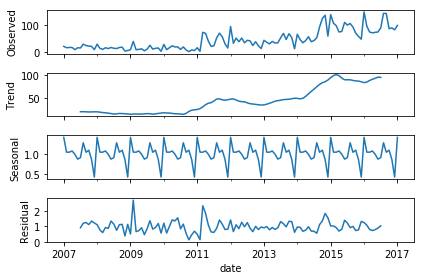

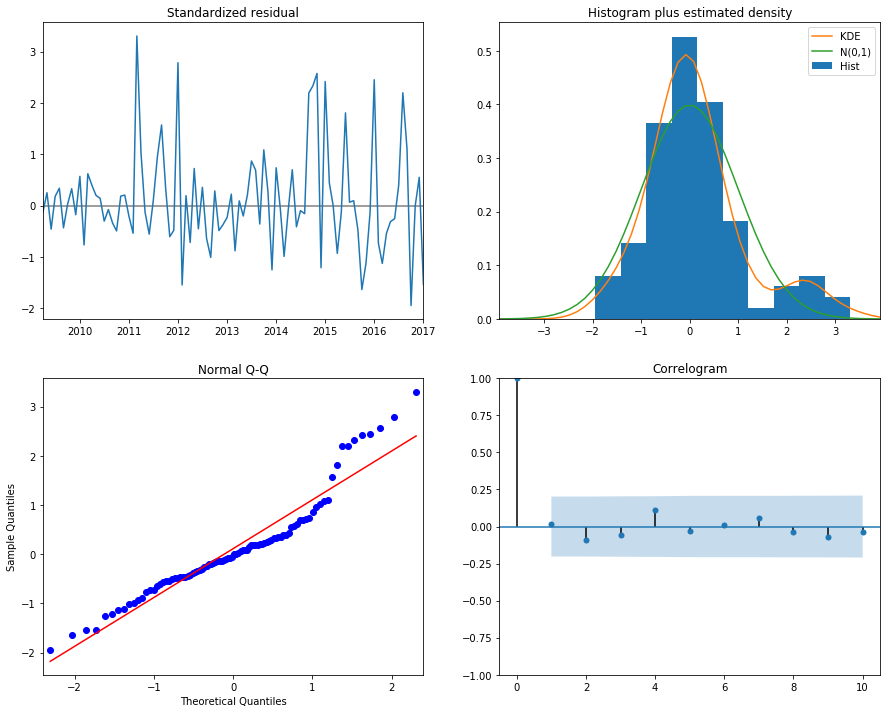

The Mean Squared Error of our forecasts is 388.2
('The root of Mean Squared Error of our forecasts is :', 19.70290906350889)


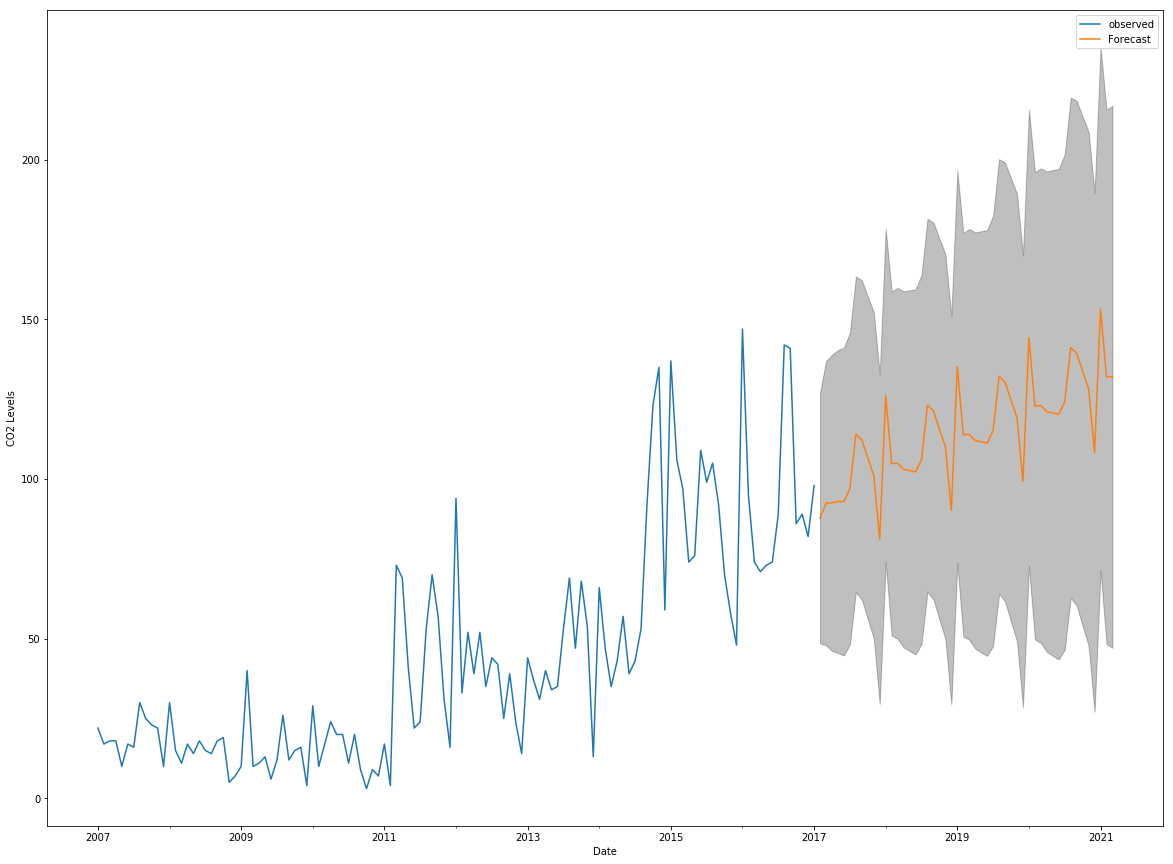

('the prediction for', 'Kia')
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2289      0.178     -1.287      0.198      -0.577       0.120
ma.L1         -0.4944      0.171     -2.892      0.004      -0.829      -0.159
ar.S.L12       0.0002      0.088      0.002      0.999      -0.173       0.174
ma.S.L12      -1.0000      0.113     -8.837      0.000      -1.222      -0.778
sigma2      3560.3993   3.18e-05   1.12e+08      0.000    3560.399    3560.399


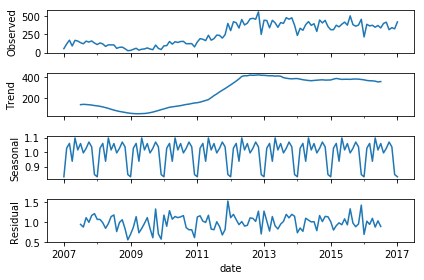

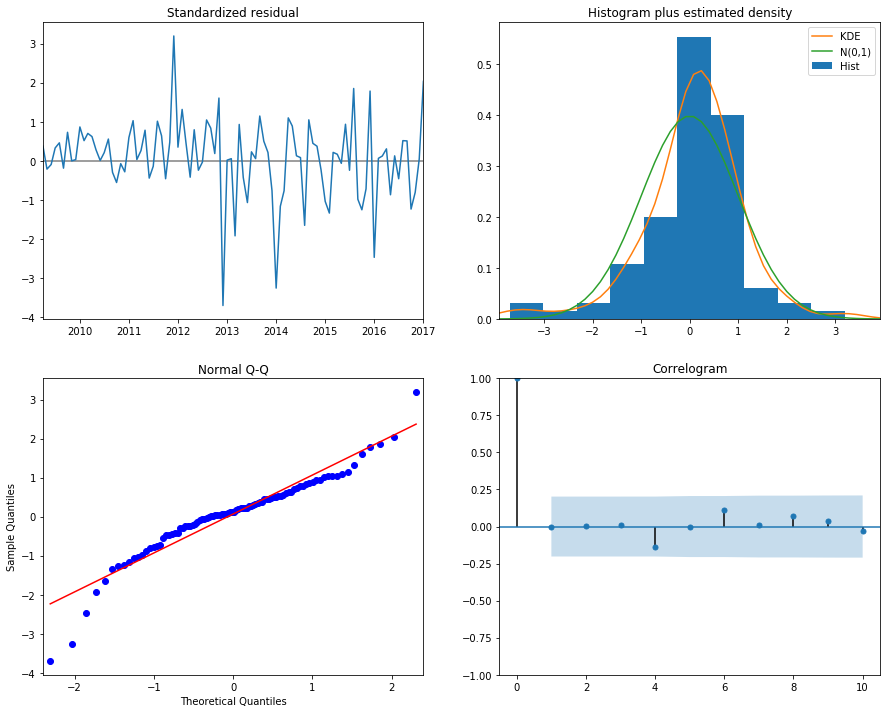

The Mean Squared Error of our forecasts is 3814.7
('The root of Mean Squared Error of our forecasts is :', 61.76322146416539)


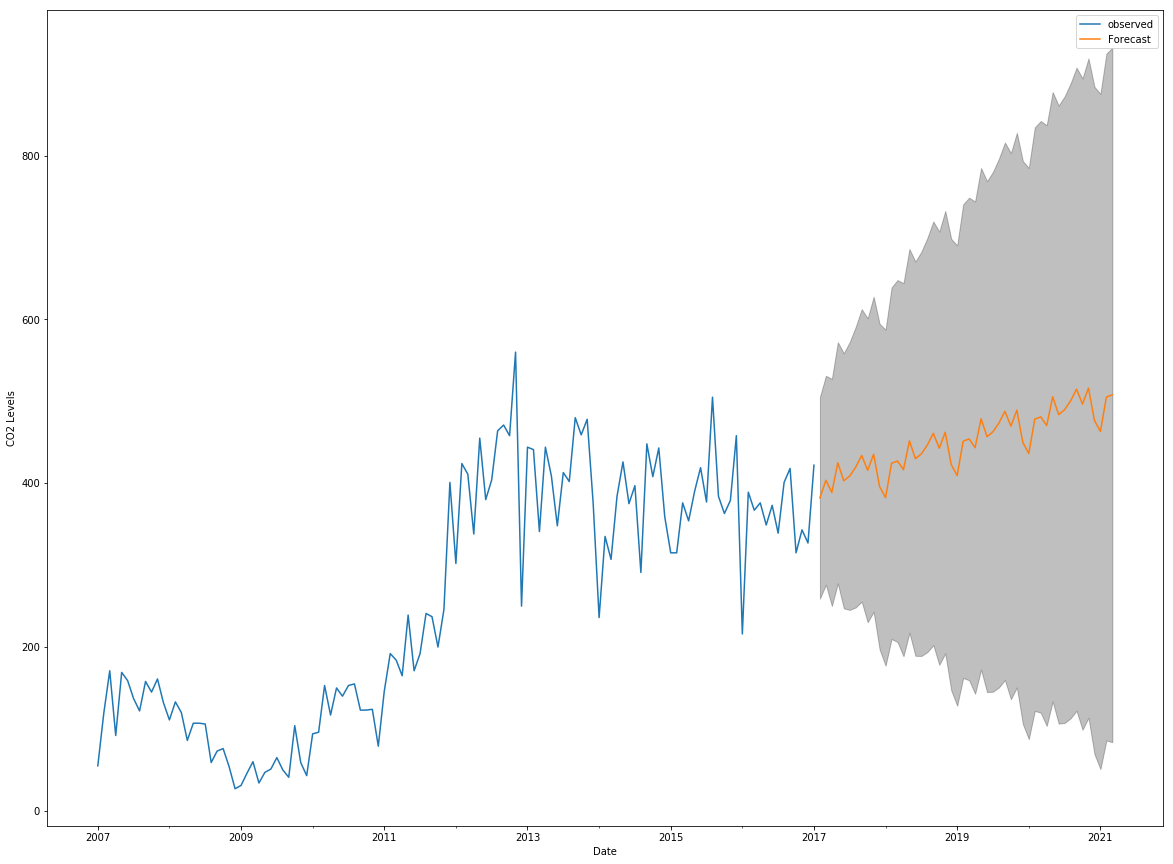

('the prediction for', 'Suzuki')
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1664      0.200      0.834      0.405      -0.225       0.558
ma.L1         -0.6047      0.160     -3.768      0.000      -0.919      -0.290
ar.S.L12       0.0105      0.067      0.157      0.875      -0.120       0.141
ma.S.L12      -1.0000      0.111     -9.032      0.000      -1.217      -0.783
sigma2      2400.2759   4.61e-05    5.2e+07      0.000    2400.276    2400.276


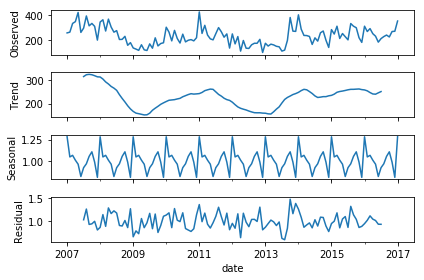

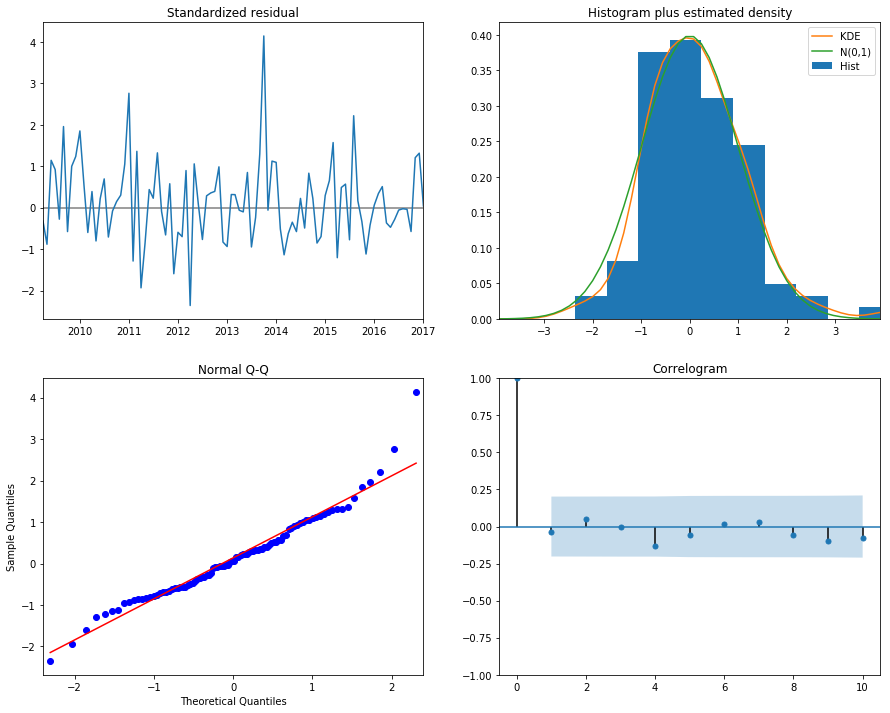

The Mean Squared Error of our forecasts is 3605.99
('The root of Mean Squared Error of our forecasts is :', 60.04992859798386)


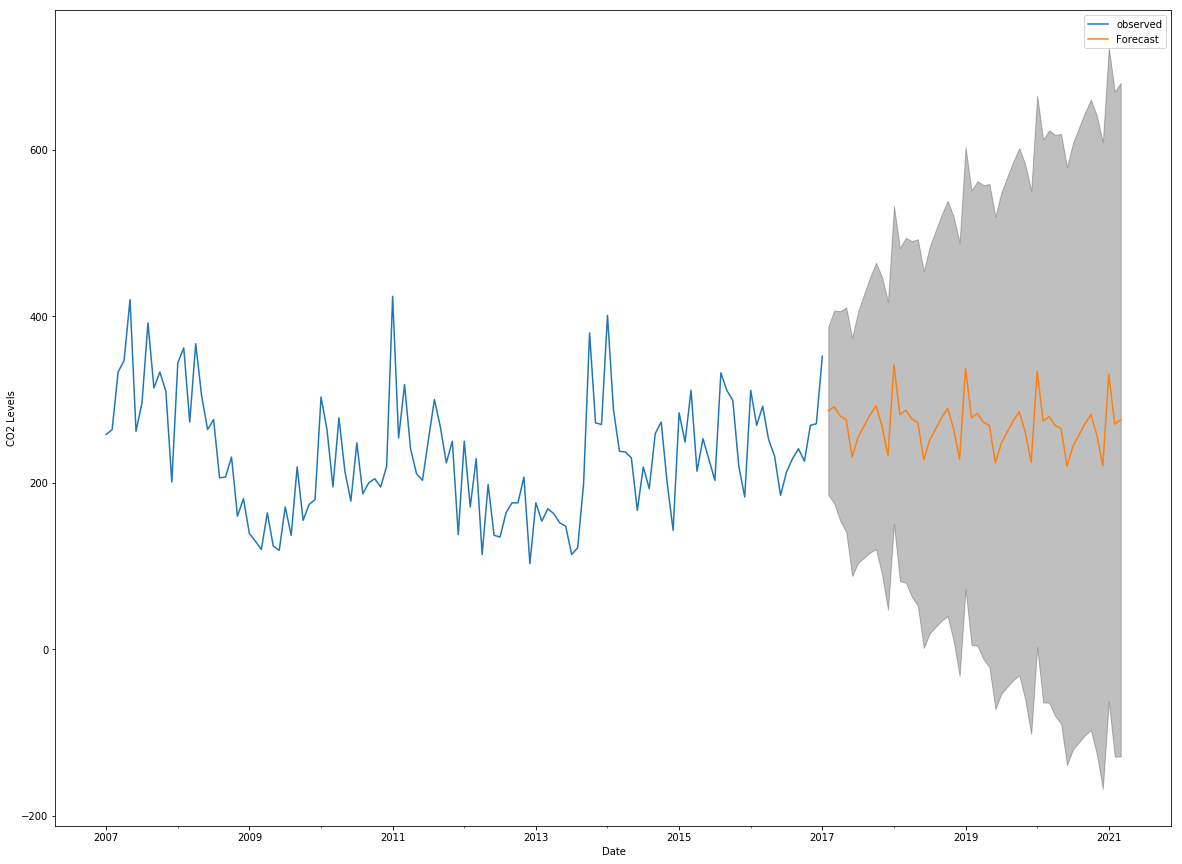

('the prediction for', 'Opel')
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0414      0.142     -0.291      0.771      -0.320       0.237
ma.L1         -0.7252      0.100     -7.227      0.000      -0.922      -0.528
ar.S.L12      -0.1285      0.151     -0.853      0.394      -0.424       0.167
ma.S.L12      -0.5138      0.155     -3.321      0.001      -0.817      -0.211
sigma2      4607.9851    706.224      6.525      0.000    3223.811    5992.159


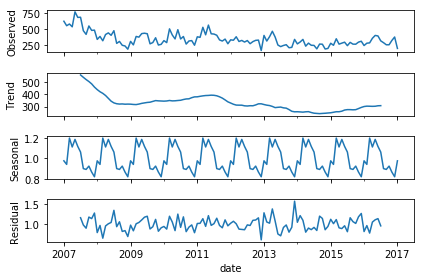

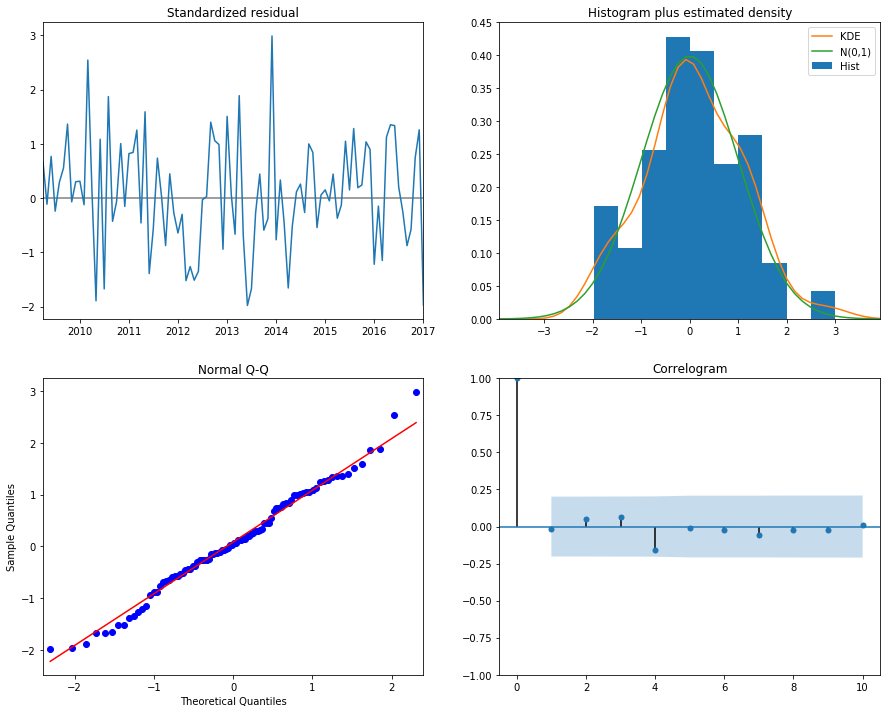

The Mean Squared Error of our forecasts is 8231.45
('The root of Mean Squared Error of our forecasts is :', 90.72734299405525)


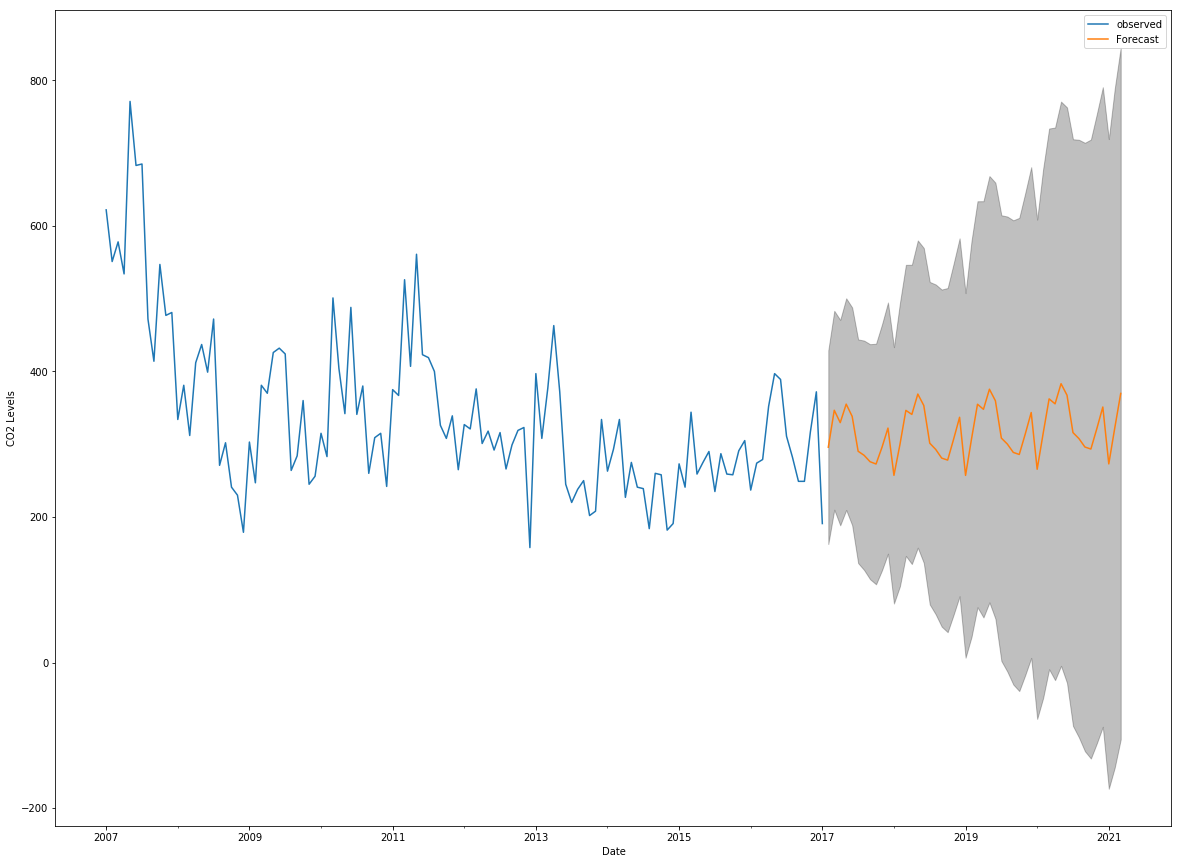

('the prediction for', 'Mazda')
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0726      0.202      0.359      0.720      -0.324       0.469
ma.L1         -0.5960      0.171     -3.488      0.000      -0.931      -0.261
ar.S.L12       0.0374      0.089      0.420      0.674      -0.137       0.212
ma.S.L12      -1.0001      0.104     -9.630      0.000      -1.204      -0.797
sigma2      8506.9056   1.22e-05   6.97e+08      0.000    8506.906    8506.906


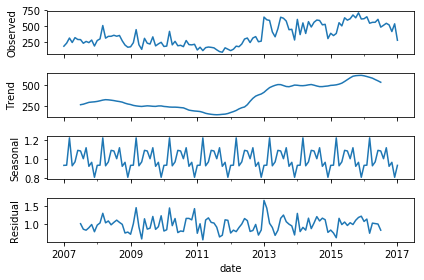

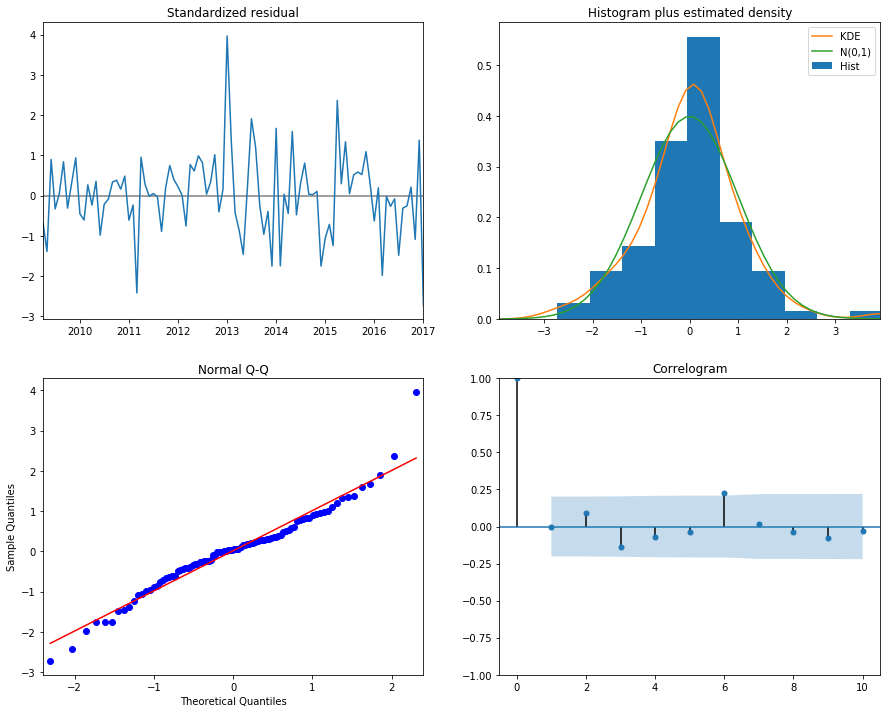

The Mean Squared Error of our forecasts is 9316.61
('The root of Mean Squared Error of our forecasts is :', 96.52260468992344)


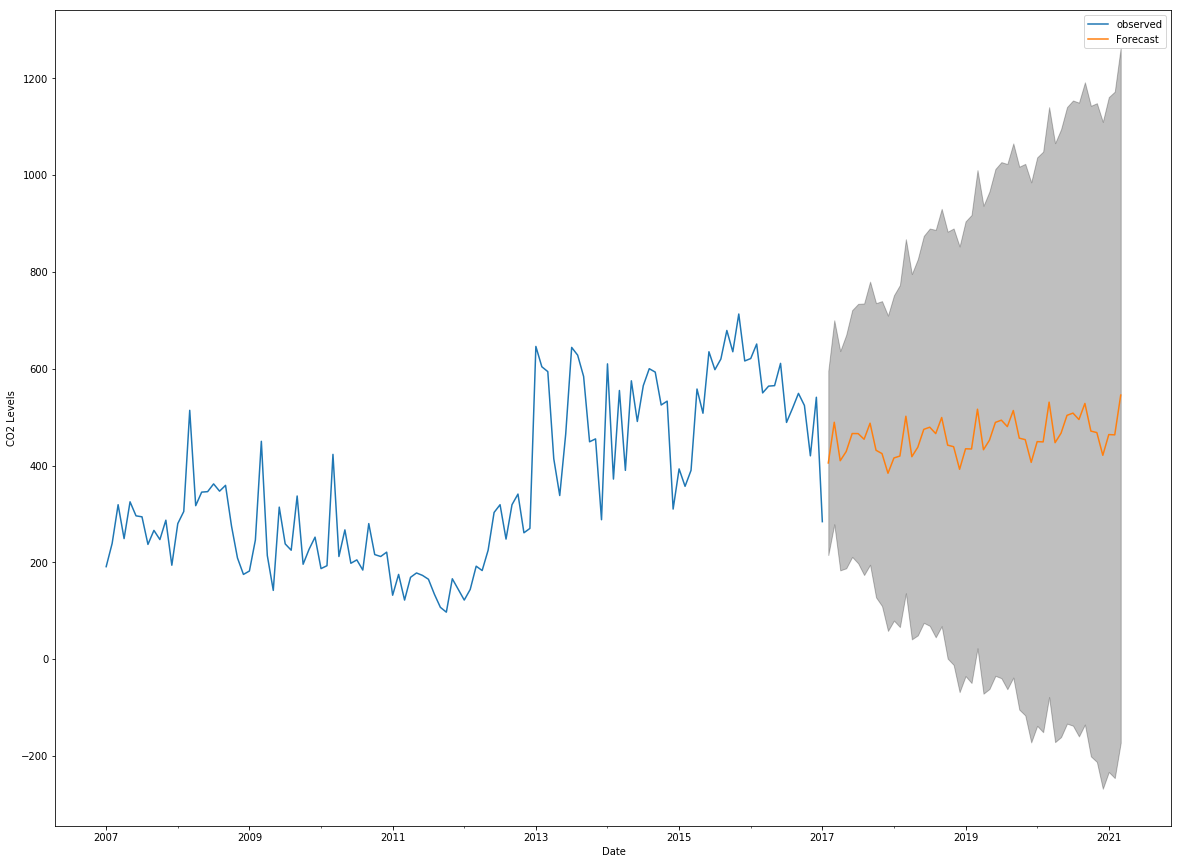

('the prediction for', 'Skoda')
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1694      0.164      1.032      0.302      -0.152       0.491
ma.L1         -0.6691      0.127     -5.282      0.000      -0.917      -0.421
ar.S.L12       0.0015      0.114      0.013      0.989      -0.222       0.225
ma.S.L12      -1.0000      0.157     -6.353      0.000      -1.309      -0.692
sigma2      6494.1145   2.42e-05   2.68e+08      0.000    6494.114    6494.115


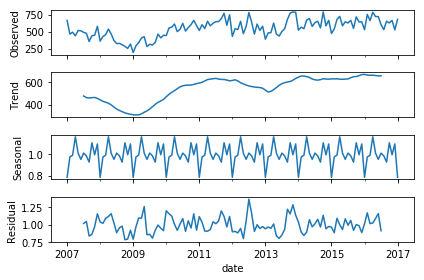

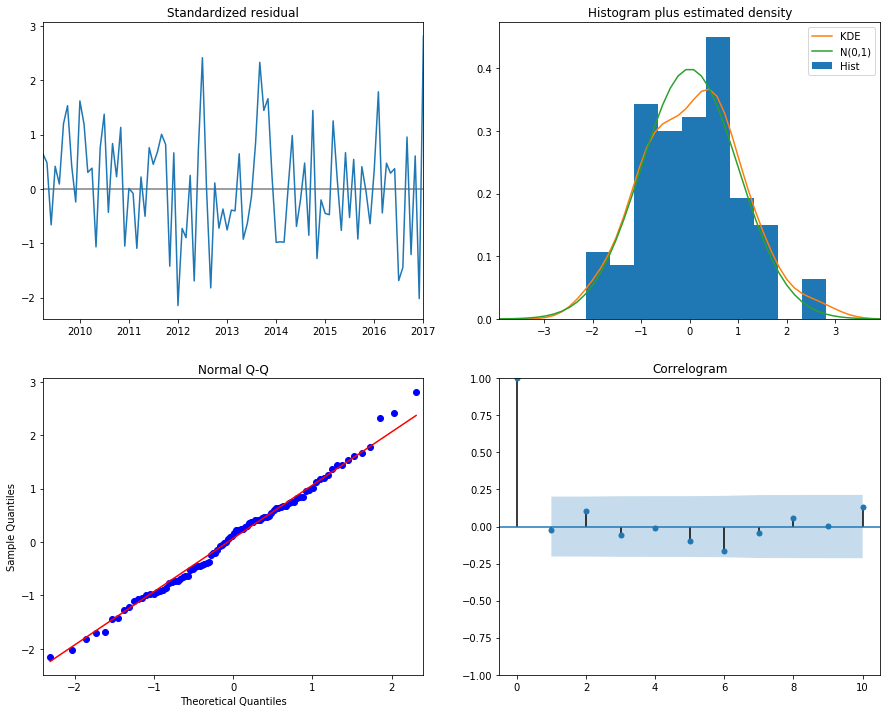

The Mean Squared Error of our forecasts is 12649.11
('The root of Mean Squared Error of our forecasts is :', 112.46825814380279)


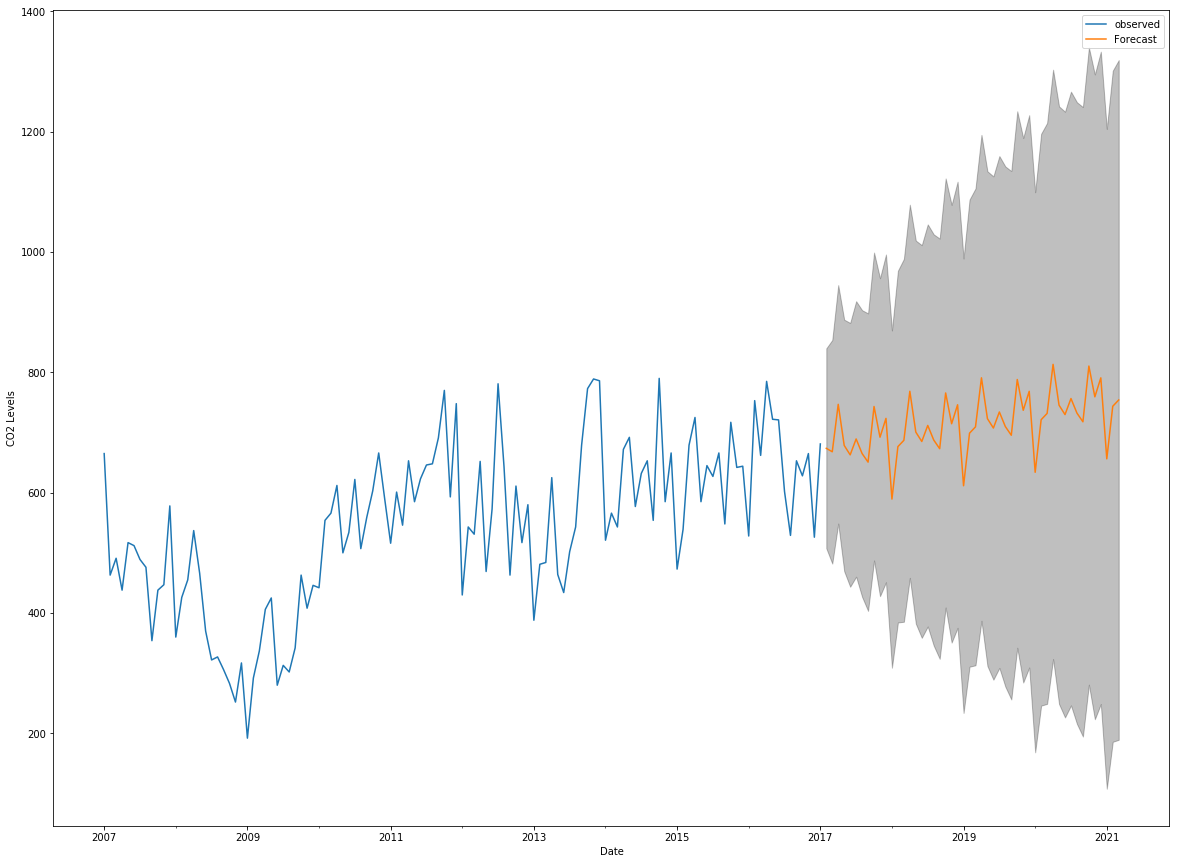

('the prediction for', 'Volvo')
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1734      0.120     -1.447      0.148      -0.408       0.061
ma.L1         -0.5782      0.135     -4.296      0.000      -0.842      -0.314
ar.S.L12       0.3235      0.060      5.420      0.000       0.206       0.440
ma.S.L12      -0.9999      0.105     -9.482      0.000      -1.207      -0.793
sigma2      3.101e+04    3.4e-06   9.12e+09      0.000     3.1e+04     3.1e+04


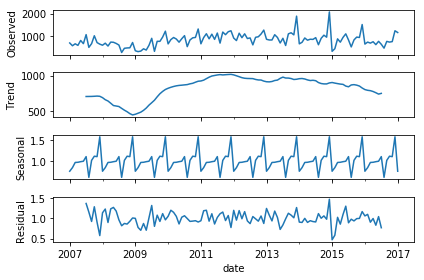

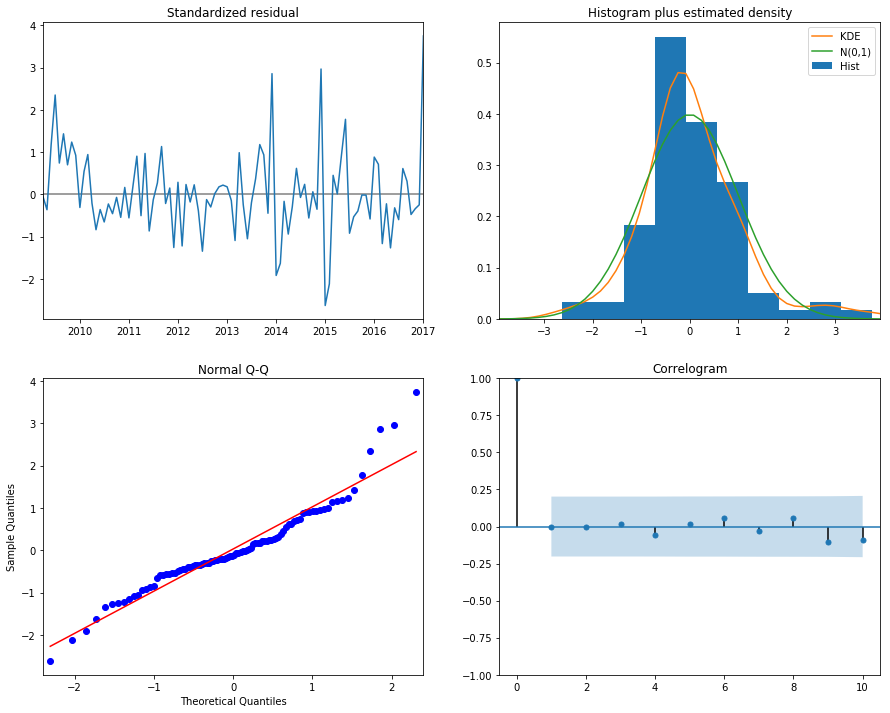

The Mean Squared Error of our forecasts is 43861.09
('The root of Mean Squared Error of our forecasts is :', 209.4303983943216)


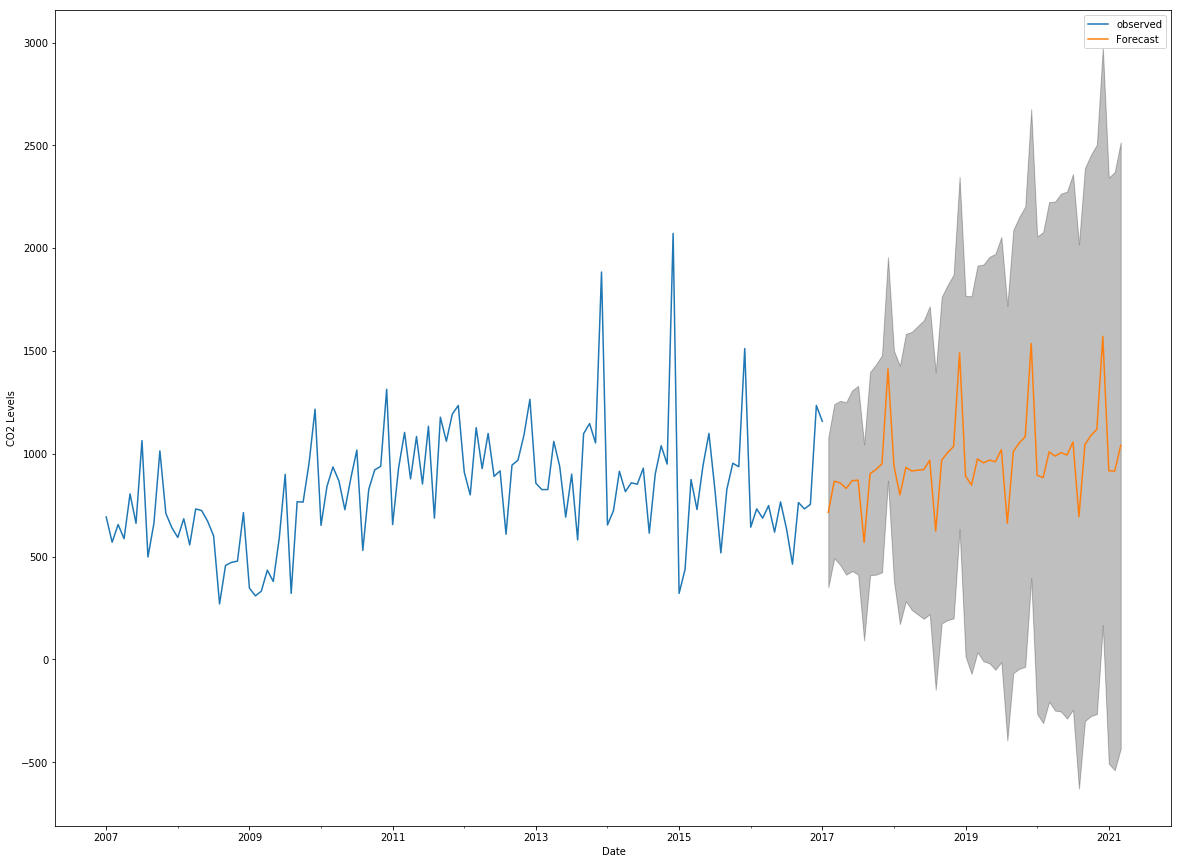

('the prediction for', 'Mercedes-Benz')
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0449      0.127     -0.353      0.724      -0.294       0.205
ma.L1         -0.6975      0.105     -6.613      0.000      -0.904      -0.491
ar.S.L12      -0.0406      0.132     -0.306      0.759      -0.300       0.219
ma.S.L12      -1.0000      0.151     -6.632      0.000      -1.296      -0.705
sigma2      6659.8478   2.26e-05   2.94e+08      0.000    6659.848    6659.848


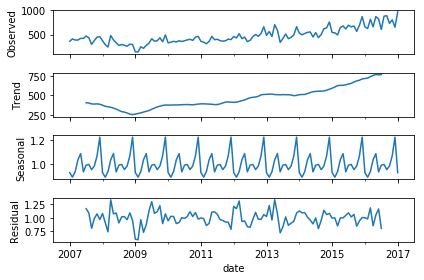

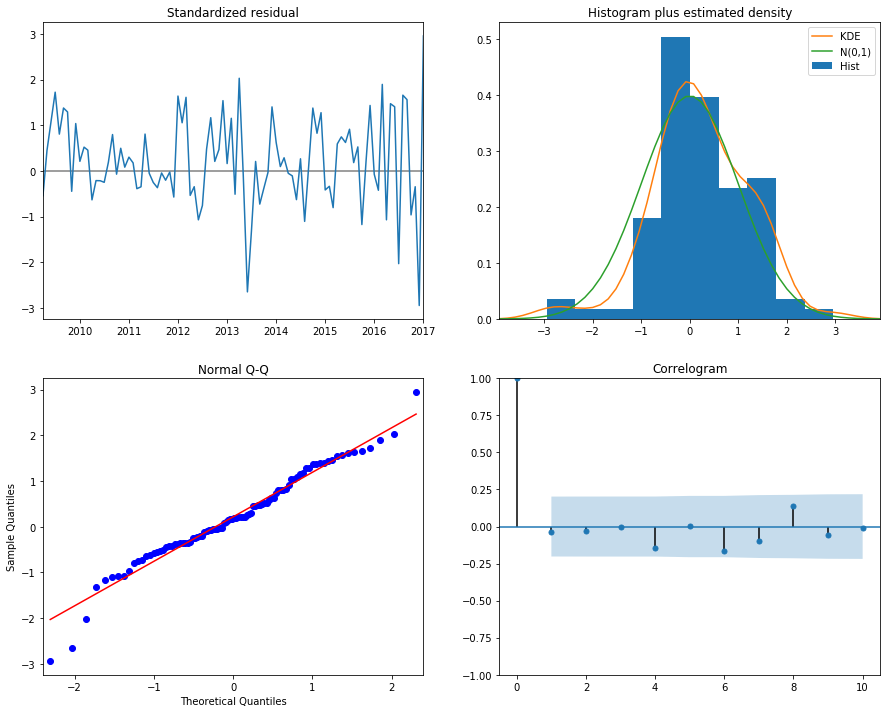

The Mean Squared Error of our forecasts is 9078.21
('The root of Mean Squared Error of our forecasts is :', 95.2796527549667)


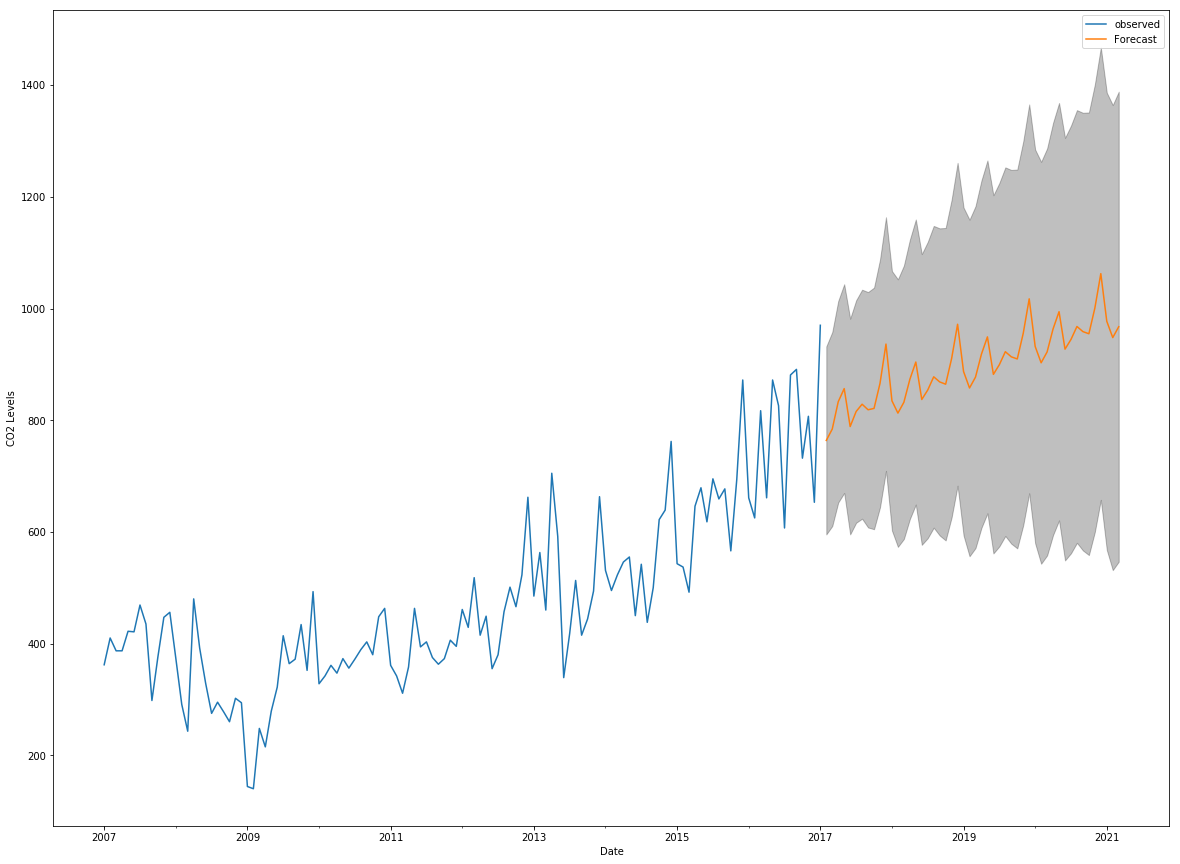

('the prediction for', 'BMW')
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3898      0.115     -3.385      0.001      -0.615      -0.164
ma.L1         -0.4000      0.112     -3.568      0.000      -0.620      -0.180
ar.S.L12      -0.0134      0.229     -0.058      0.953      -0.462       0.435
ma.S.L12      -0.5967      0.178     -3.360      0.001      -0.945      -0.249
sigma2      2.121e+04   2417.173      8.776      0.000    1.65e+04     2.6e+04


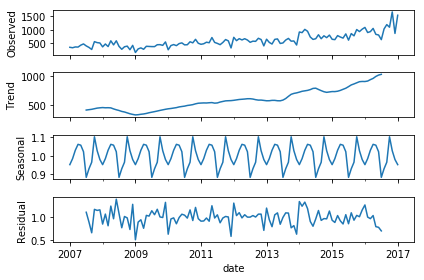

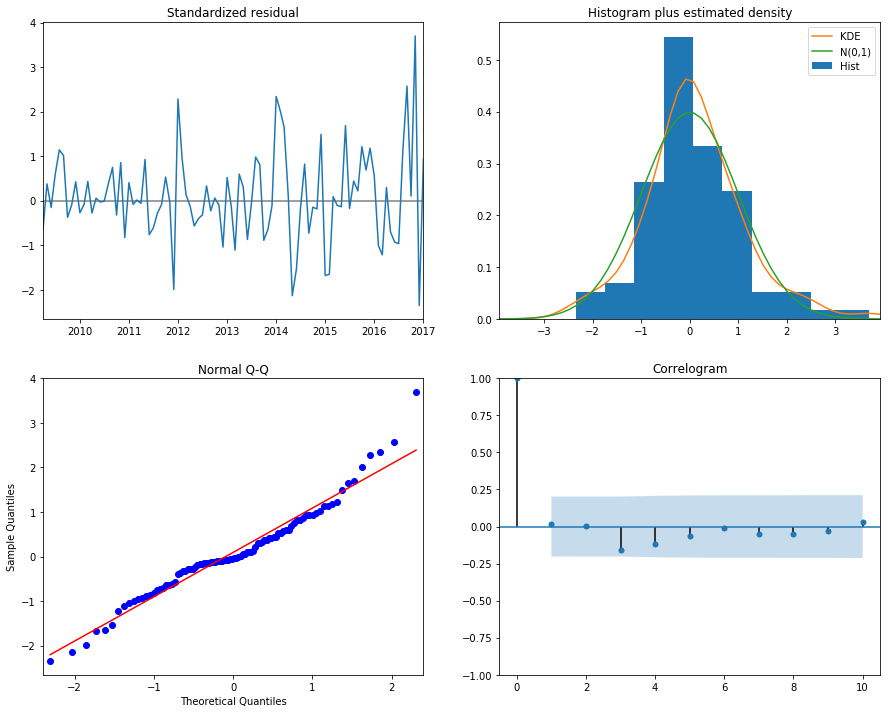

The Mean Squared Error of our forecasts is 21355.5
('The root of Mean Squared Error of our forecasts is :', 146.1352238516121)


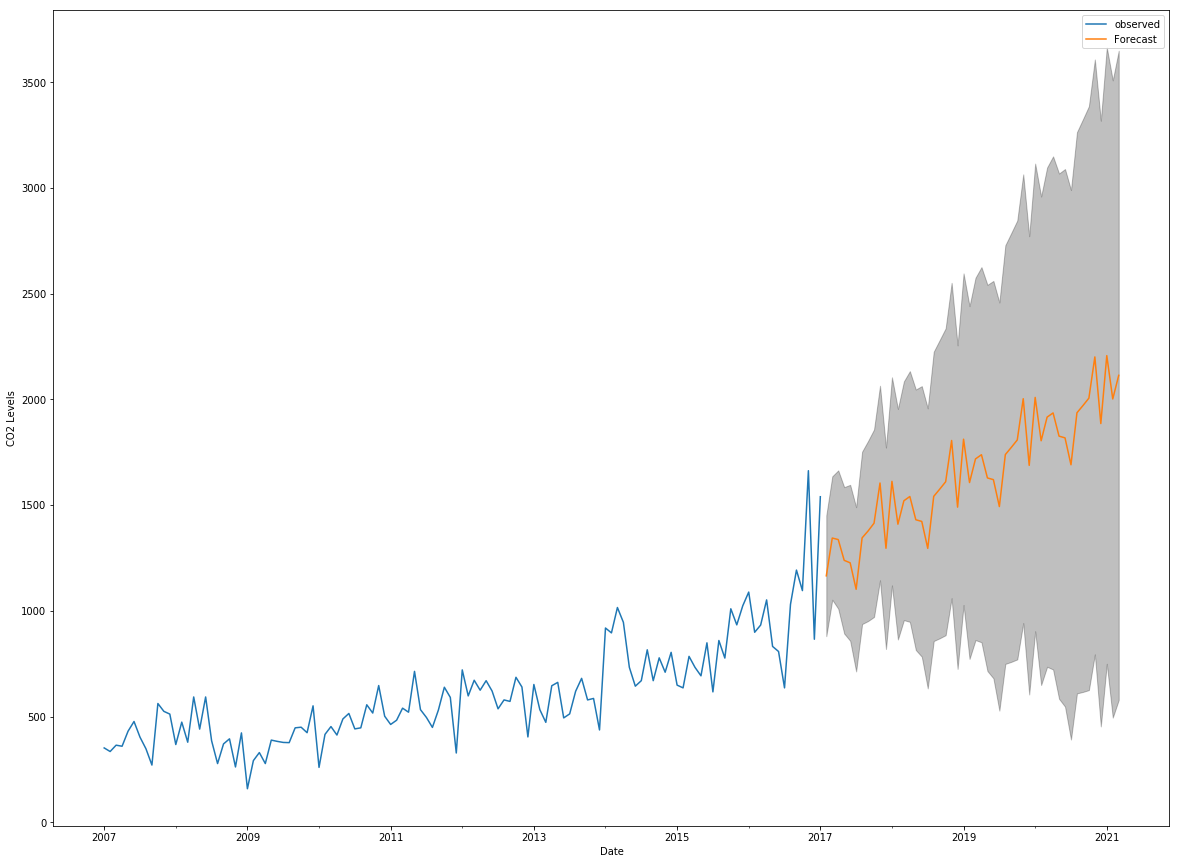

('the prediction for', 'MINI')
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2827      0.143      1.976      0.048       0.002       0.563
ma.L1         -0.8294      0.089     -9.345      0.000      -1.003      -0.655
ar.S.L12       0.0002      0.146      0.001      0.999      -0.286       0.287
ma.S.L12      -1.0000   2824.825     -0.000      1.000   -5537.555    5535.555
sigma2       247.2844   6.99e+05      0.000      1.000   -1.37e+06    1.37e+06


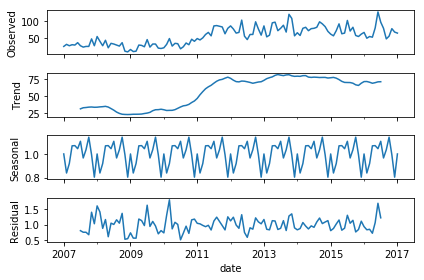

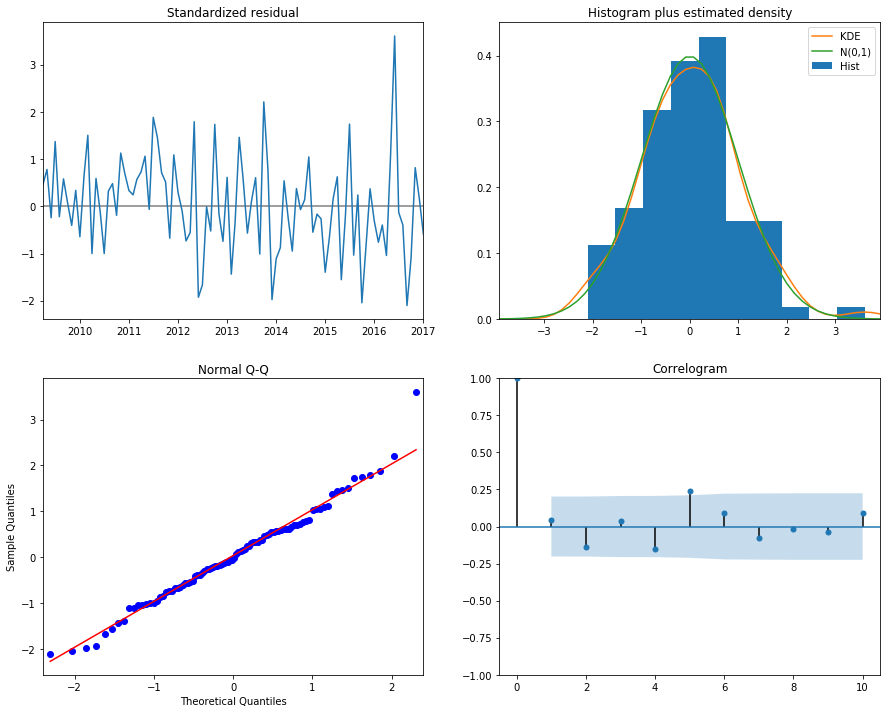

The Mean Squared Error of our forecasts is 289.49
('The root of Mean Squared Error of our forecasts is :', 17.01427754889719)


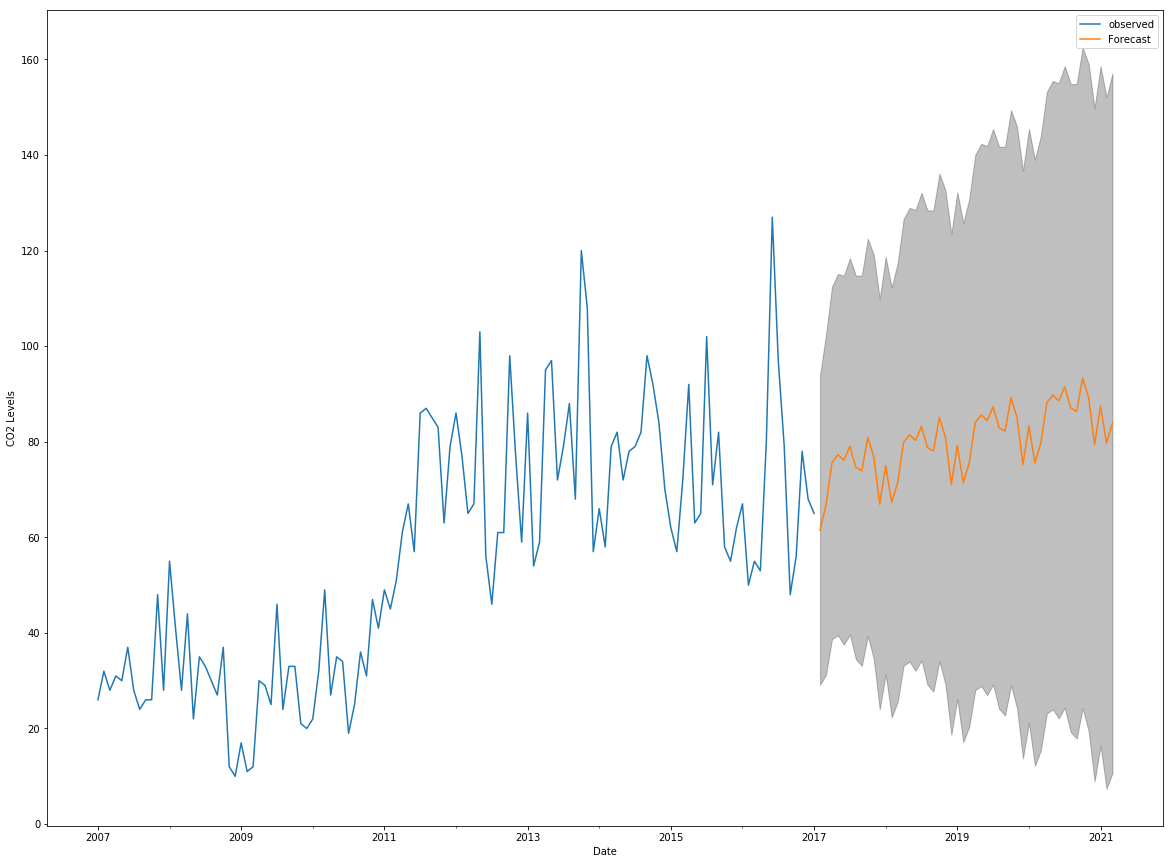

('the prediction for', 'Fiat')
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5234      0.135     -3.879      0.000      -0.788      -0.259
ma.L1         -0.1047      0.152     -0.690      0.490      -0.402       0.193
ar.S.L12      -0.2899      0.131     -2.215      0.027      -0.546      -0.033
ma.S.L12      -0.5731      0.158     -3.629      0.000      -0.883      -0.264
sigma2       431.1395     57.680      7.475      0.000     318.089     544.190


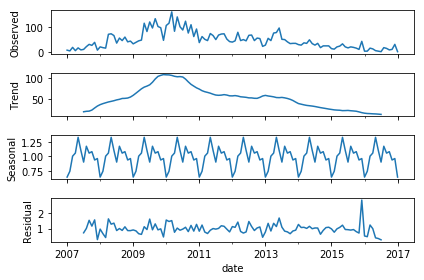

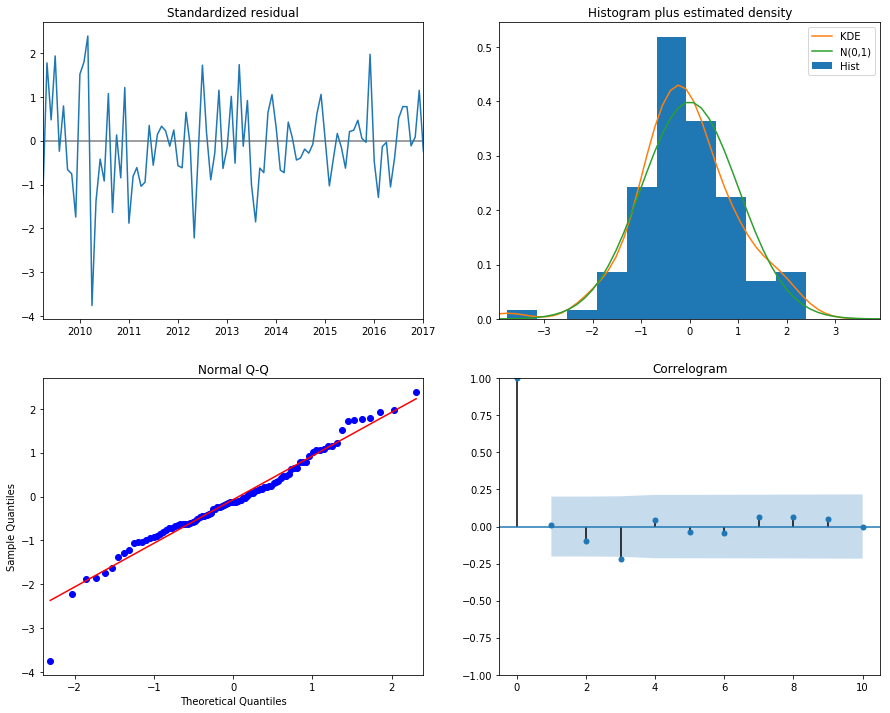

The Mean Squared Error of our forecasts is 467.1
('The root of Mean Squared Error of our forecasts is :', 21.612580754142154)


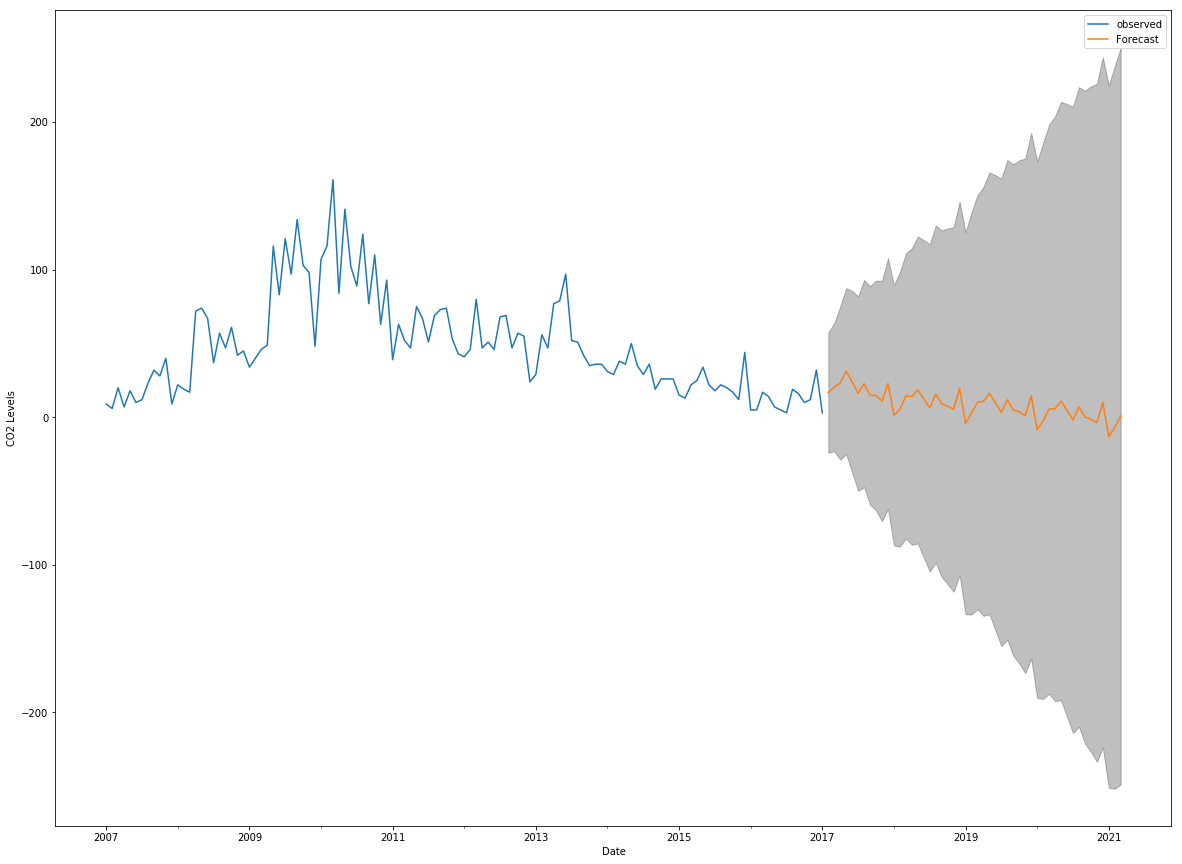

('the prediction for', 'Hyundai')
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0807      0.225     -0.359      0.720      -0.522       0.360
ma.L1         -0.5631      0.197     -2.861      0.004      -0.949      -0.177
ar.S.L12       0.0272      0.108      0.252      0.801      -0.185       0.239
ma.S.L12      -0.8707      0.268     -3.253      0.001      -1.395      -0.346
sigma2      6722.1304   1377.214      4.881      0.000    4022.841    9421.420


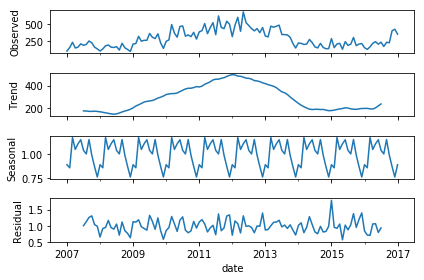

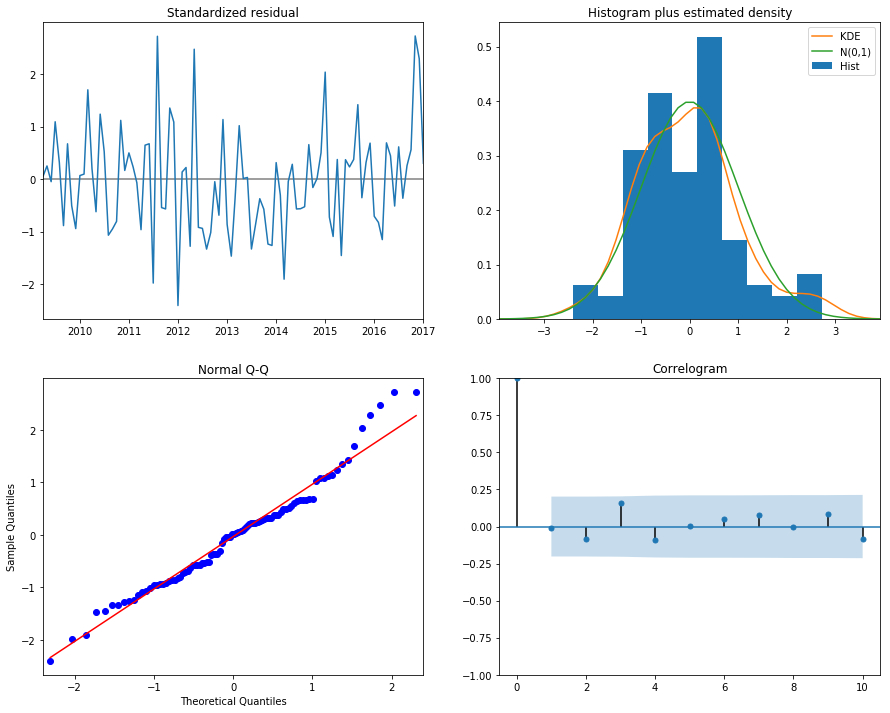

The Mean Squared Error of our forecasts is 6866.62
('The root of Mean Squared Error of our forecasts is :', 82.86507961403545)


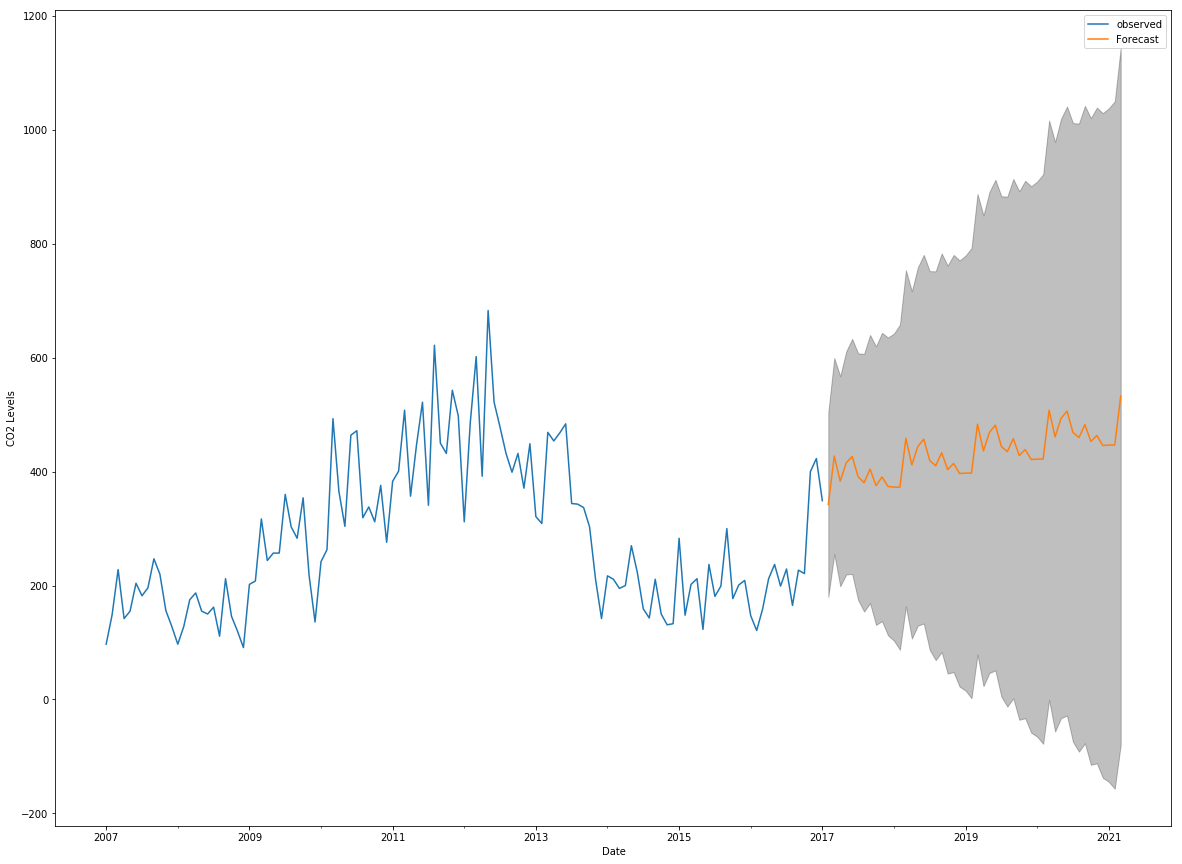

('the prediction for', 'Honda')
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0611      0.128      0.475      0.635      -0.191       0.313
ma.L1         -0.6654      0.114     -5.854      0.000      -0.888      -0.443
ar.S.L12      -0.0661      0.027     -2.461      0.014      -0.119      -0.013
ma.S.L12      -1.0000      0.168     -5.969      0.000      -1.328      -0.672
sigma2      2334.7254   7.18e-05   3.25e+07      0.000    2334.725    2334.726


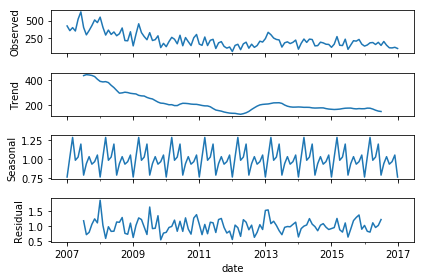

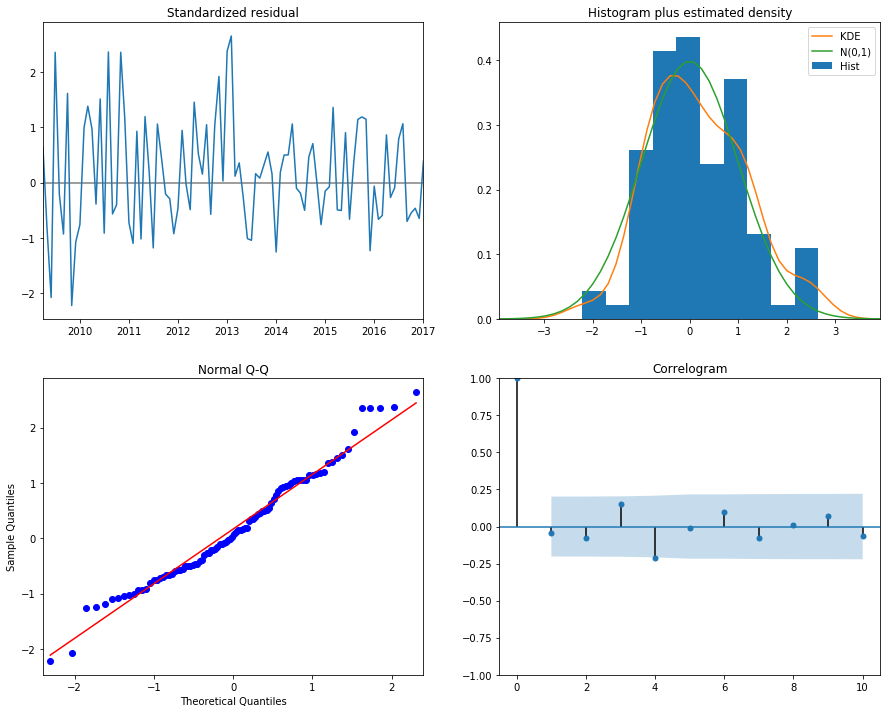

The Mean Squared Error of our forecasts is 7016.34
('The root of Mean Squared Error of our forecasts is :', 83.76361779447463)


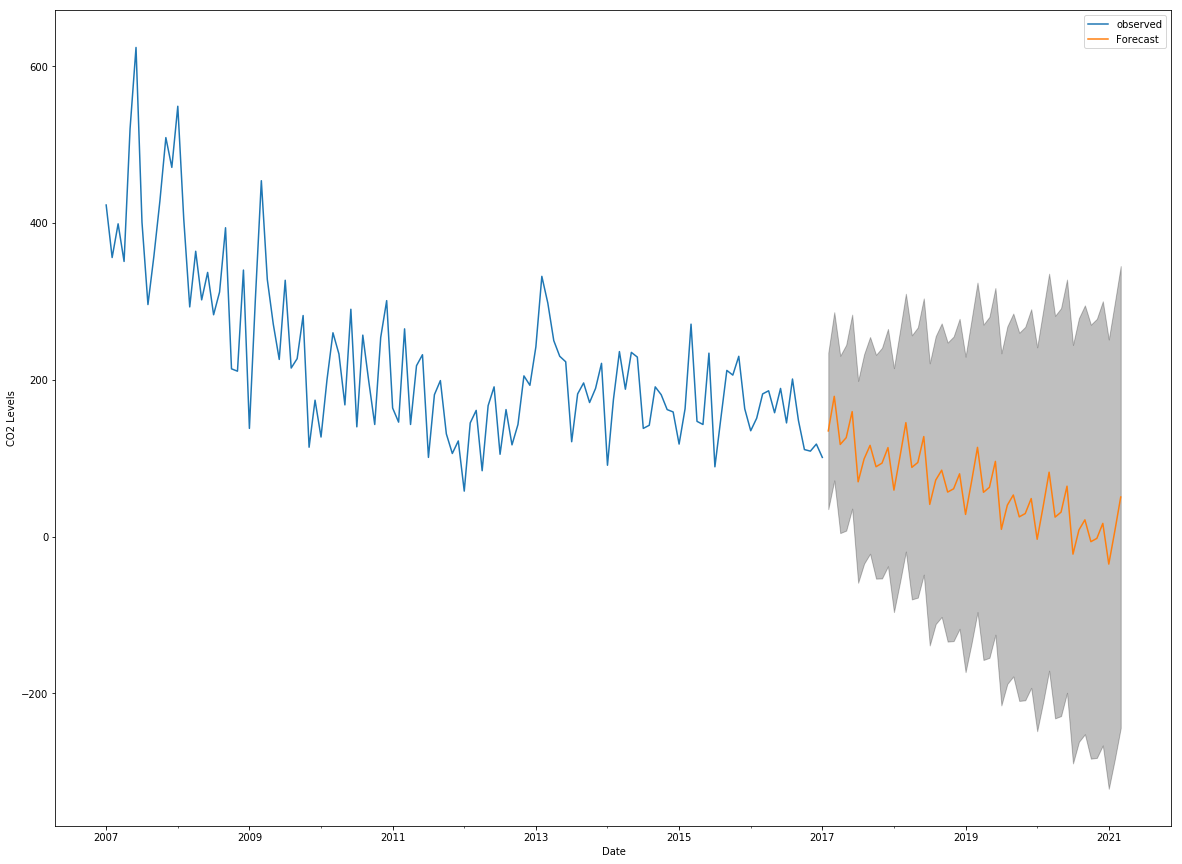

('the prediction for', 'Ford')
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0111      0.155      0.071      0.943      -0.293       0.315
ma.L1         -0.6476      0.109     -5.941      0.000      -0.861      -0.434
ar.S.L12       0.1911      0.083      2.304      0.021       0.029       0.354
ma.S.L12      -1.0349      1.198     -0.864      0.388      -3.383       1.313
sigma2      2.265e+04   2.89e+04      0.783      0.434   -3.41e+04    7.94e+04


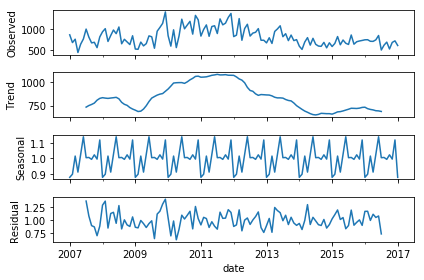

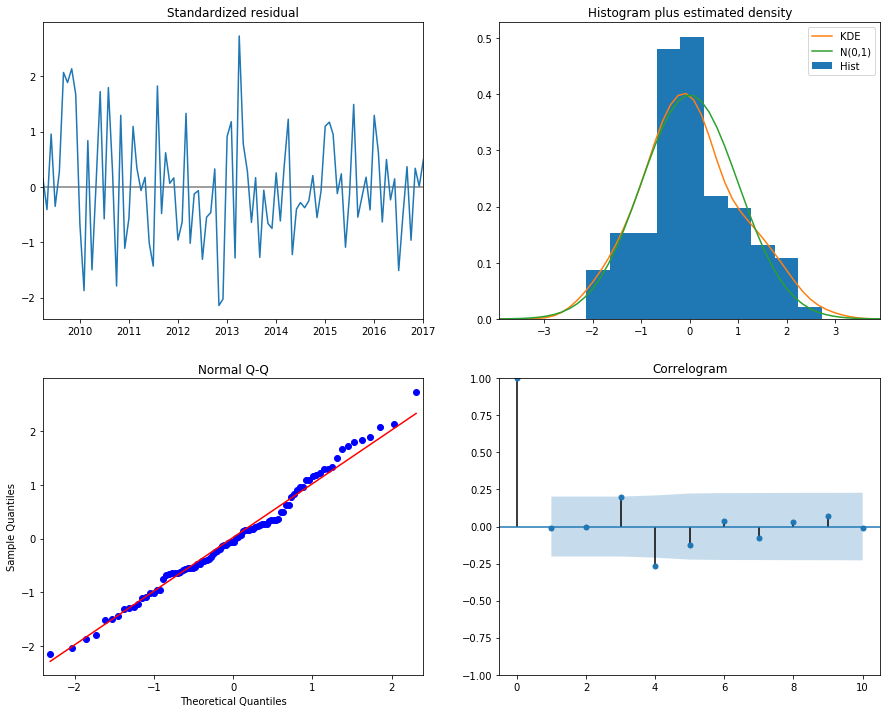

The Mean Squared Error of our forecasts is 36309.58
('The root of Mean Squared Error of our forecasts is :', 190.55072484009682)


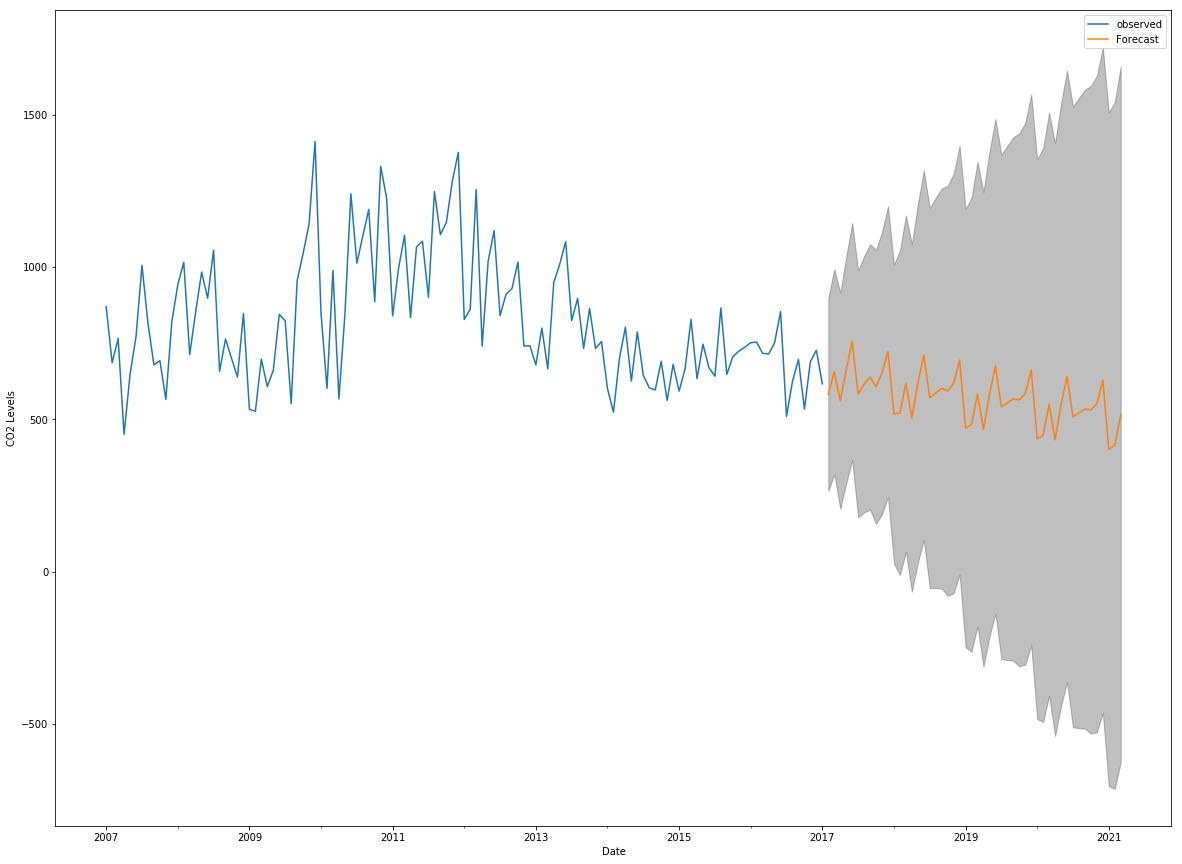

('the prediction for', 'Land Rover')
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2183      0.226      0.966      0.334      -0.224       0.661
ma.L1         -0.6348      0.168     -3.785      0.000      -0.963      -0.306
ar.S.L12      -0.1335      0.138     -0.971      0.332      -0.403       0.136
ma.S.L12      -0.6842      0.137     -4.989      0.000      -0.953      -0.415
sigma2       241.3095     31.565      7.645      0.000     179.443     303.176


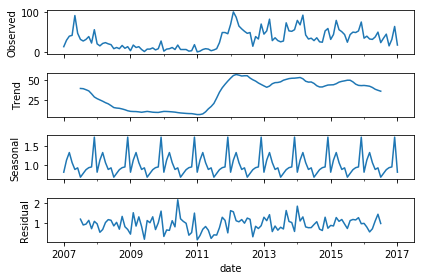

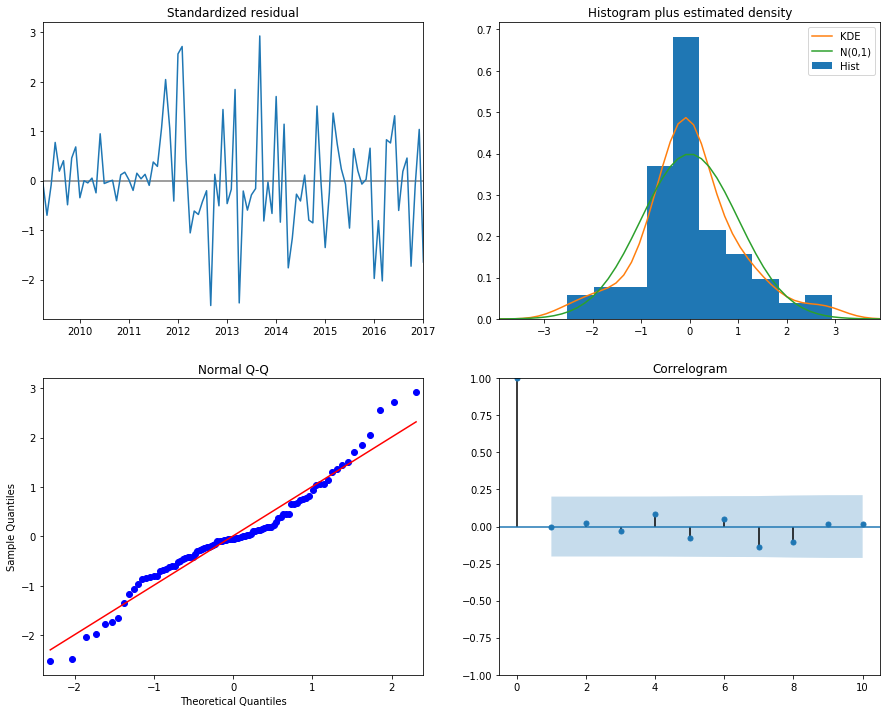

The Mean Squared Error of our forecasts is 293.03
('The root of Mean Squared Error of our forecasts is :', 17.118196493739237)


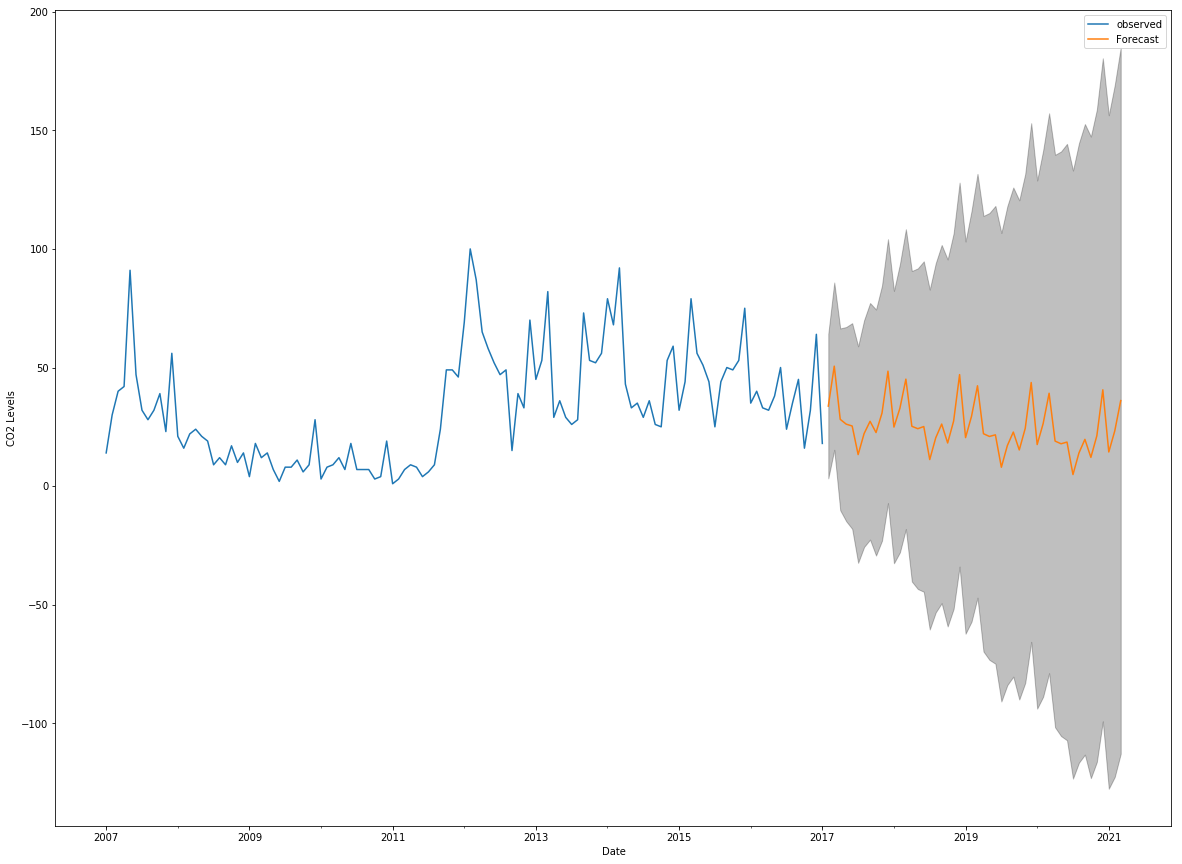

('the prediction for', 'Renault')
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1884      0.092     -2.057      0.040      -0.368      -0.009
ma.L1         -0.7650      0.069    -11.101      0.000      -0.900      -0.630
ar.S.L12      -0.0176      0.237     -0.074      0.941      -0.483       0.448
ma.S.L12      -0.1902      0.268     -0.709      0.478      -0.716       0.335
sigma2      2935.5821    185.128     15.857      0.000    2572.738    3298.426


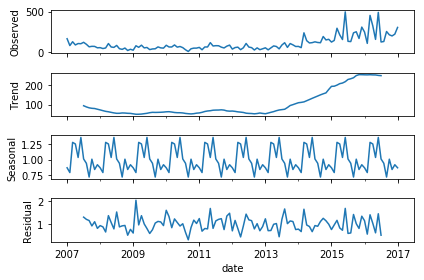

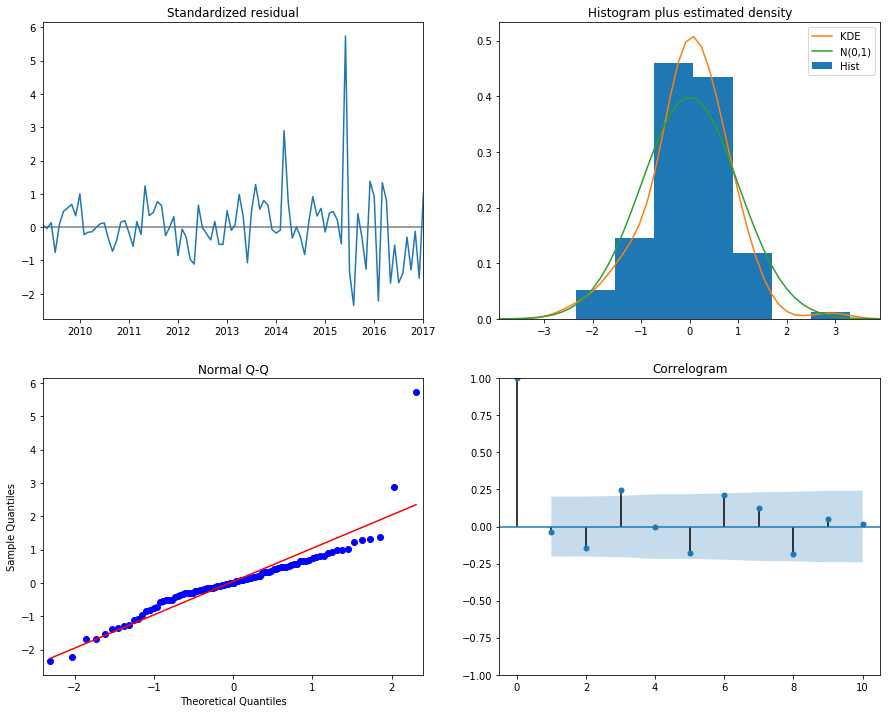

The Mean Squared Error of our forecasts is 2795.19
('The root of Mean Squared Error of our forecasts is :', 52.86953065806249)


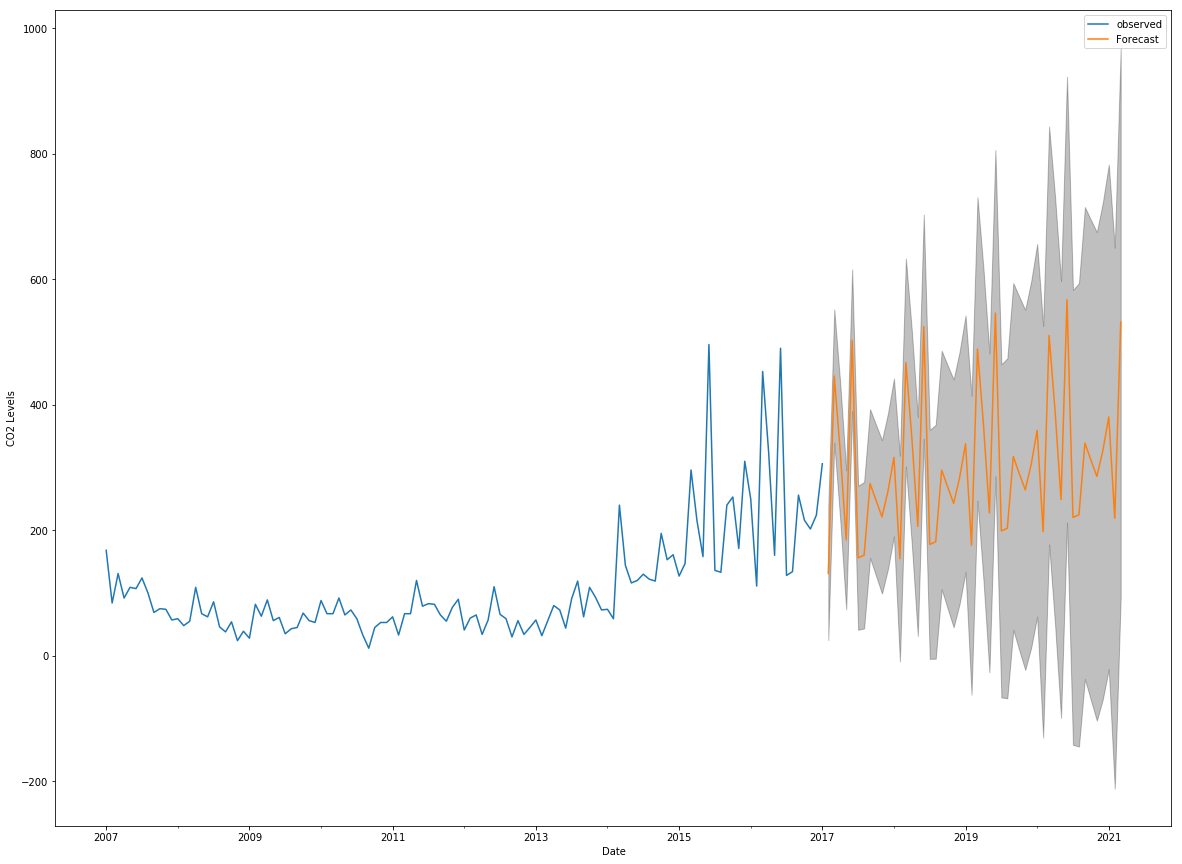

('the prediction for', 'Volkswagen')
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3010      0.177     -1.700      0.089      -0.648       0.046
ma.L1         -0.4281      0.177     -2.416      0.016      -0.775      -0.081
ar.S.L12      -0.2662      0.155     -1.721      0.085      -0.569       0.037
ma.S.L12      -0.5294      0.169     -3.135      0.002      -0.860      -0.198
sigma2      5.277e+04   1.01e+04      5.219      0.000     3.3e+04    7.26e+04


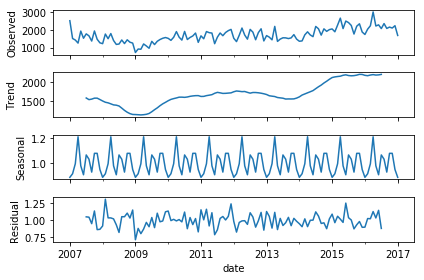

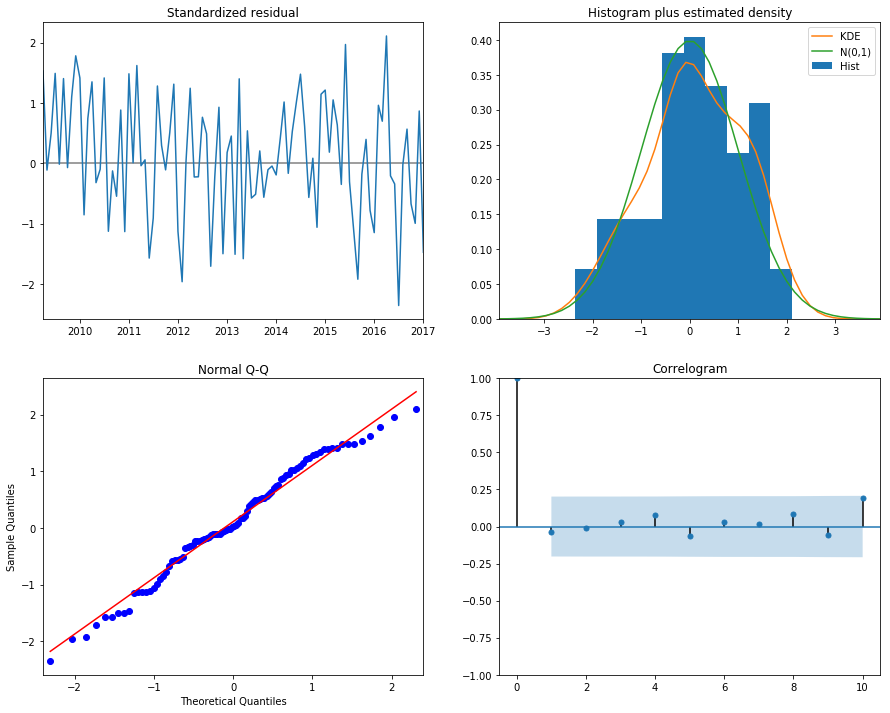

The Mean Squared Error of our forecasts is 96206.34
('The root of Mean Squared Error of our forecasts is :', 310.1714708126552)


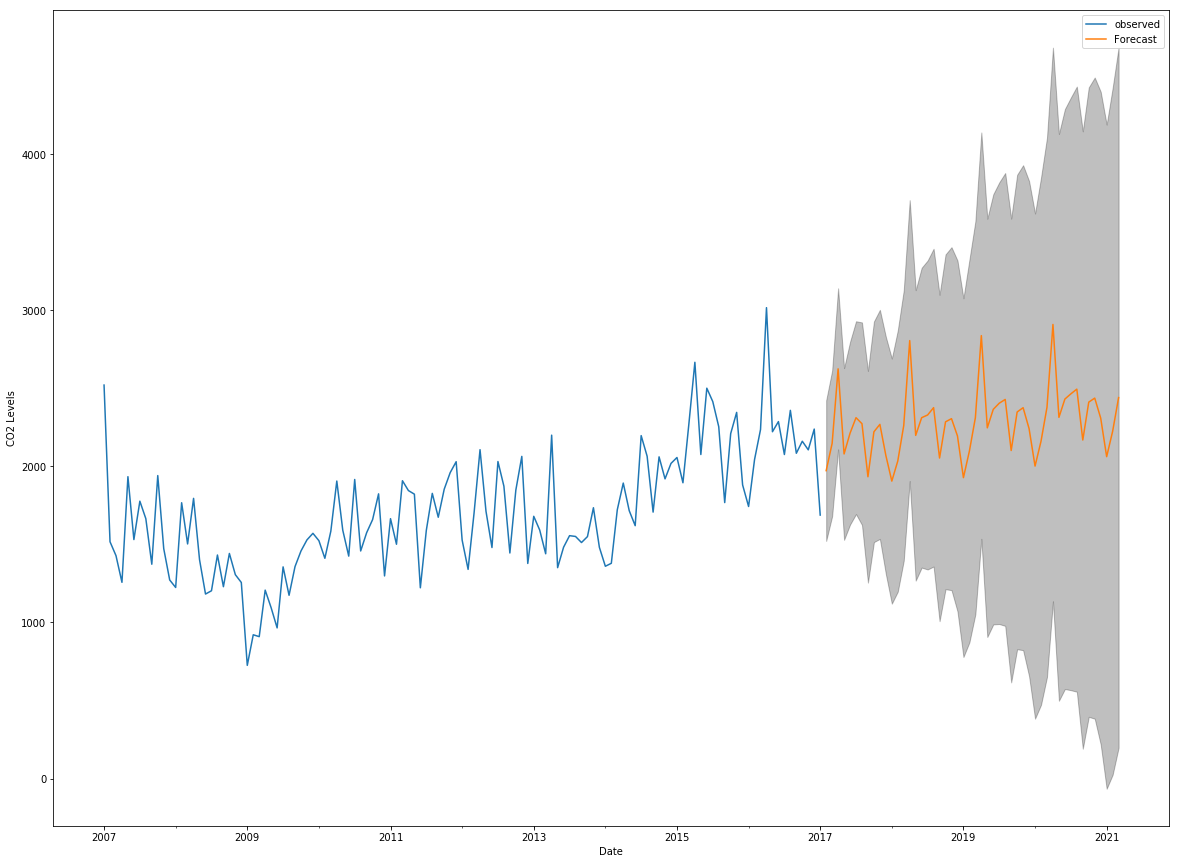

('the prediction for', 'Nissan')
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2343      0.150      1.559      0.119      -0.060       0.529
ma.L1         -0.8455      0.079    -10.739      0.000      -1.000      -0.691
ar.S.L12      -0.0031      0.223     -0.014      0.989      -0.440       0.433
ma.S.L12      -0.7219      0.228     -3.171      0.002      -1.168      -0.276
sigma2       1.47e+04   1773.408      8.287      0.000    1.12e+04    1.82e+04


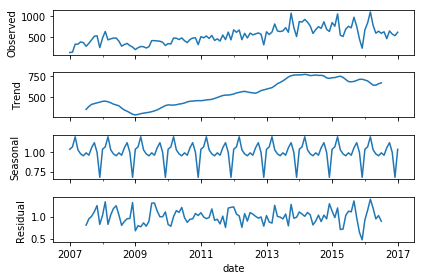

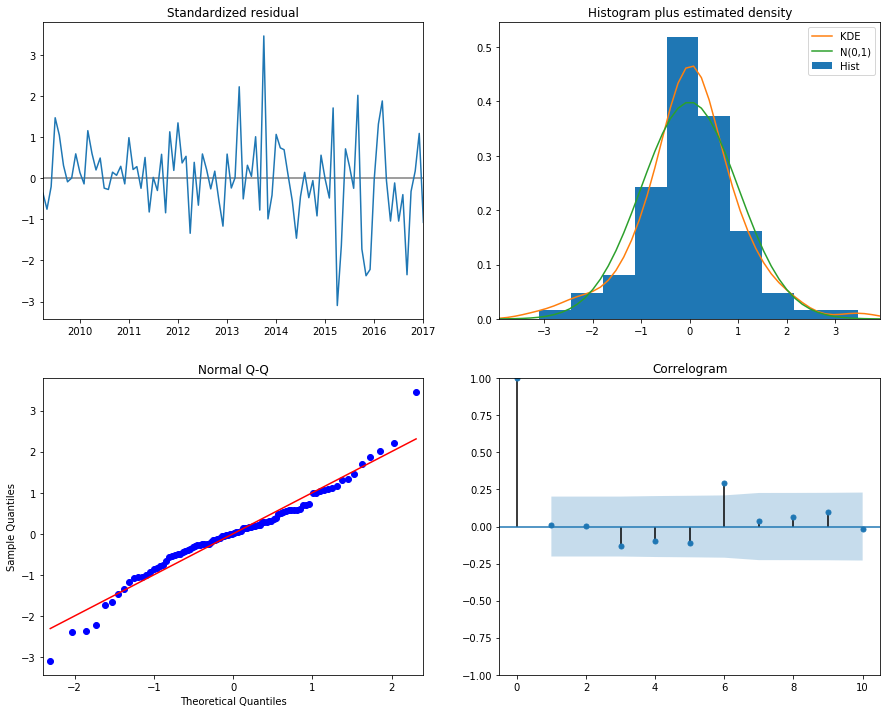

The Mean Squared Error of our forecasts is 17611.42
('The root of Mean Squared Error of our forecasts is :', 132.70803693821557)


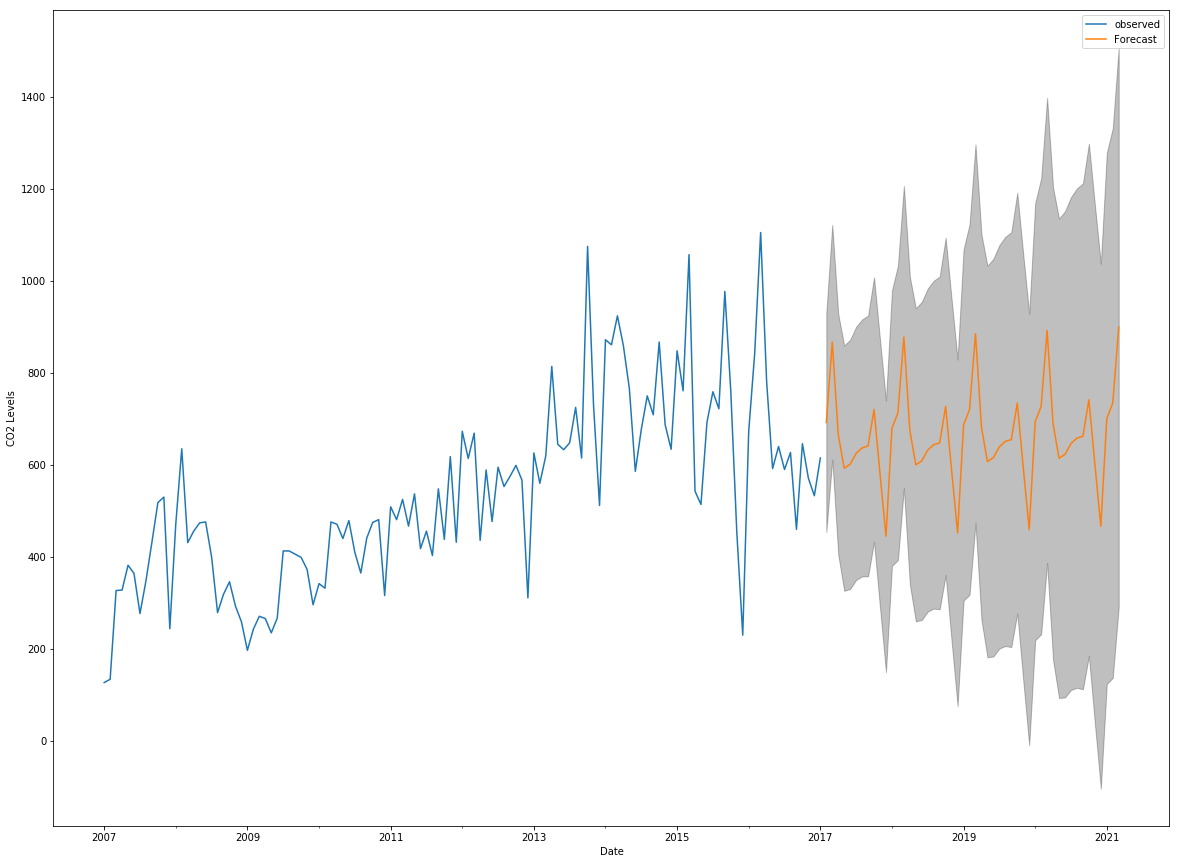

('the prediction for', 'Mitsubishi')
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2083      0.180      1.157      0.247      -0.144       0.561
ma.L1         -0.6662      0.145     -4.592      0.000      -0.951      -0.382
ar.S.L12      -0.1980      0.132     -1.499      0.134      -0.457       0.061
ma.S.L12      -0.7390      0.140     -5.285      0.000      -1.013      -0.465
sigma2      1.676e+04   2722.635      6.156      0.000    1.14e+04    2.21e+04


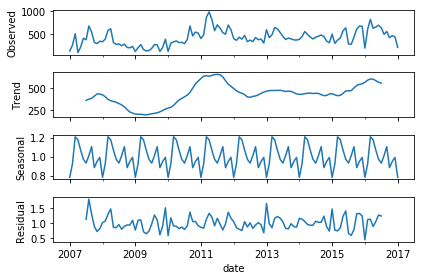

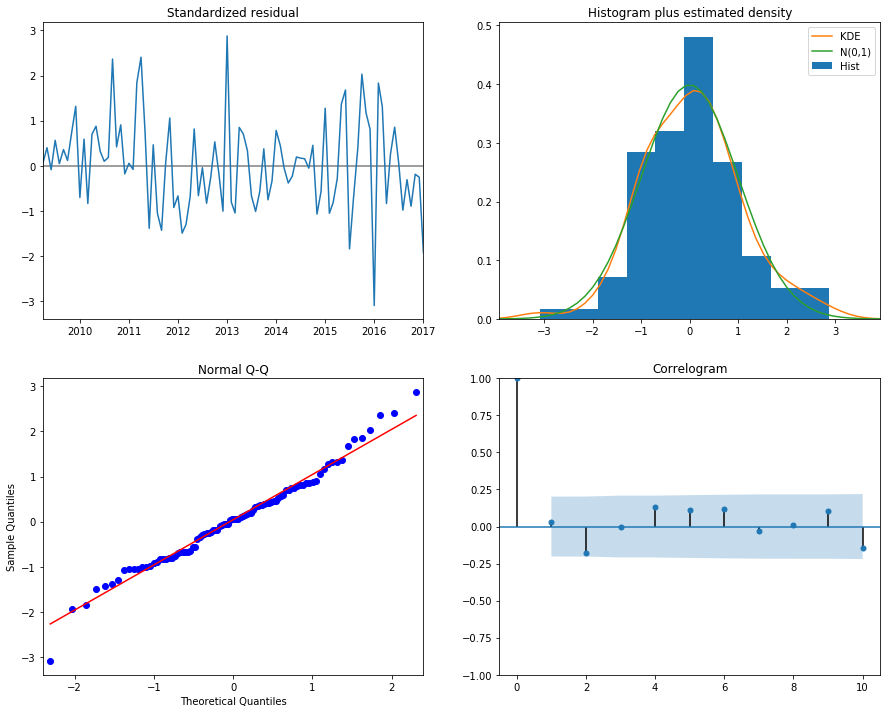

The Mean Squared Error of our forecasts is 19999.8
('The root of Mean Squared Error of our forecasts is :', 141.4206588972221)


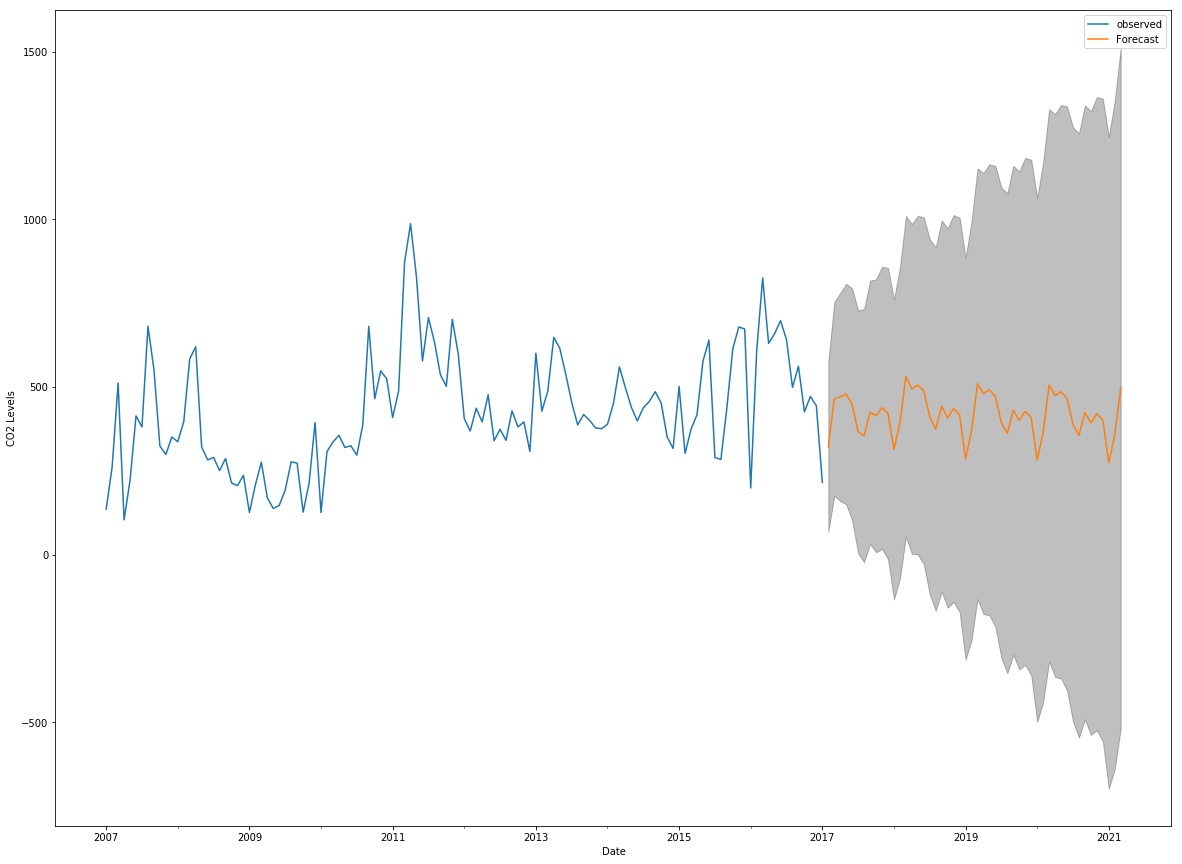

('the prediction for', 'Toyota')
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0039      0.187     -0.021      0.984      -0.370       0.363
ma.L1         -0.5604      0.171     -3.286      0.001      -0.895      -0.226
ar.S.L12       0.0395      0.109      0.363      0.717      -0.174       0.252
ma.S.L12      -0.7922      0.215     -3.683      0.000      -1.214      -0.371
sigma2      4.428e+04   7098.011      6.238      0.000    3.04e+04    5.82e+04


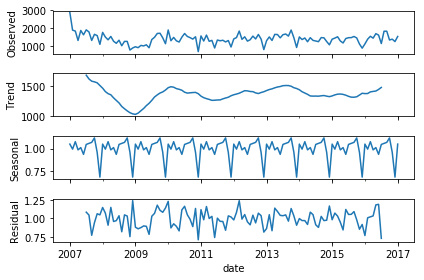

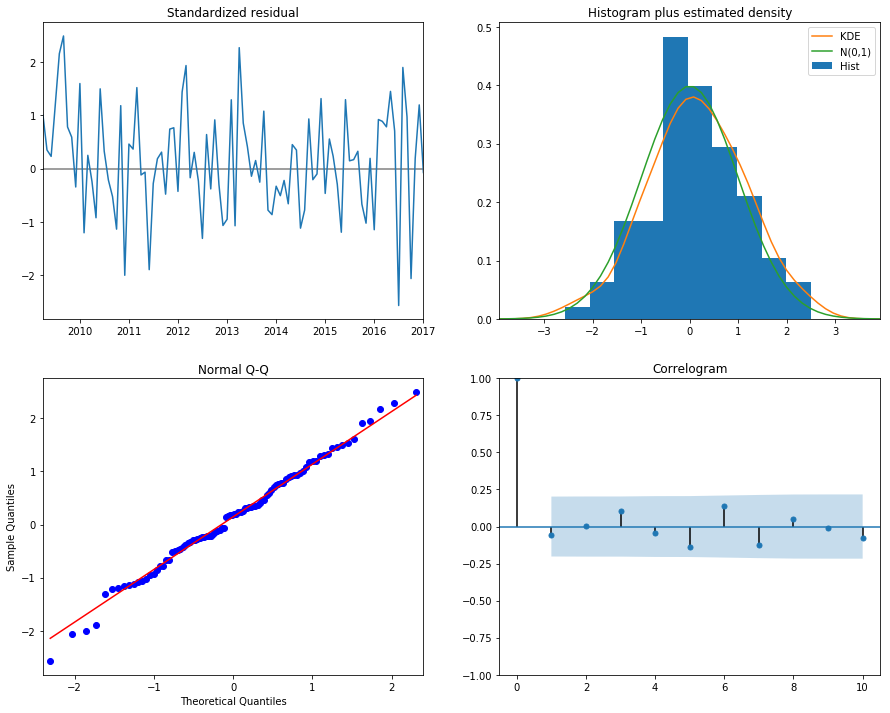

The Mean Squared Error of our forecasts is 76830.61
('The root of Mean Squared Error of our forecasts is :', 277.18334221922663)


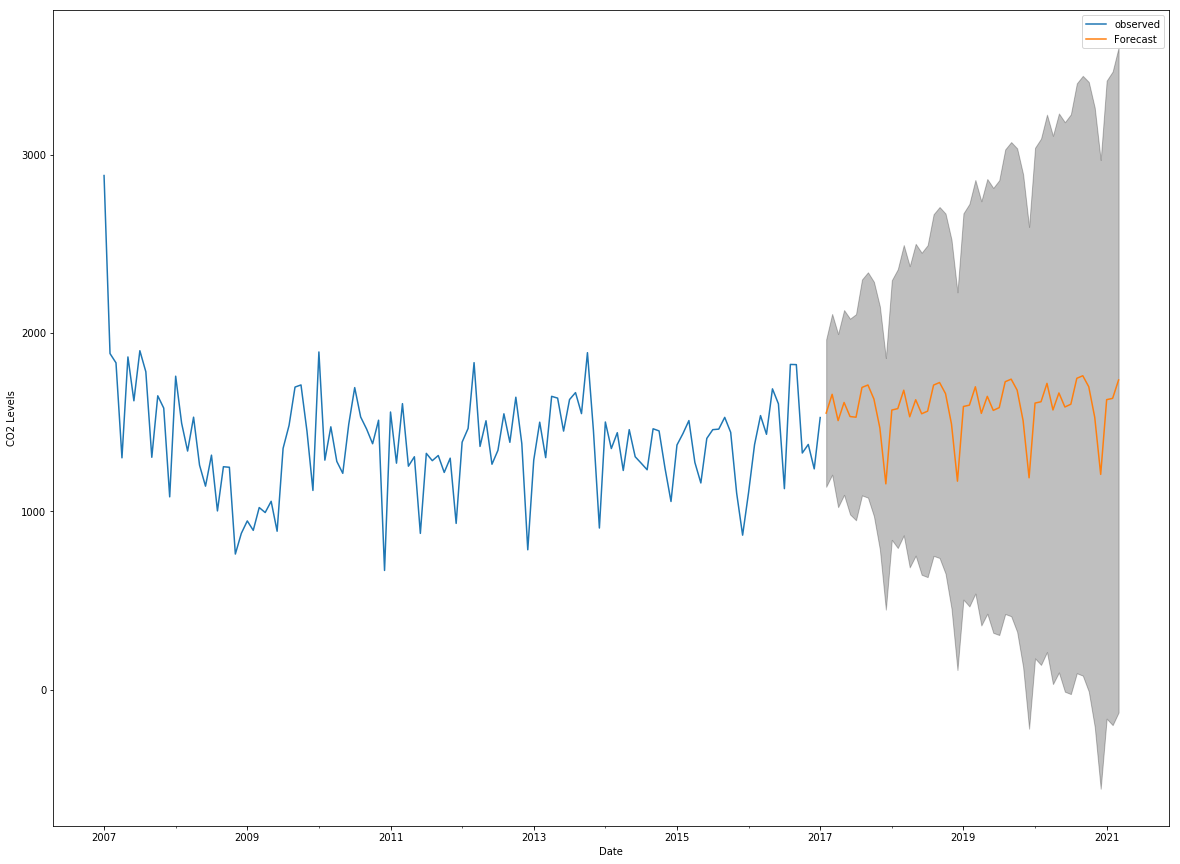

('the prediction for', 'Peugeot')
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2701      0.163     -1.660      0.097      -0.589       0.049
ma.L1         -0.5392      0.140     -3.850      0.000      -0.814      -0.265
ar.S.L12      -0.0611      0.107     -0.570      0.569      -0.271       0.149
ma.S.L12      -0.7731      0.177     -4.377      0.000      -1.119      -0.427
sigma2      1.371e+04   2215.745      6.186      0.000    9364.435     1.8e+04


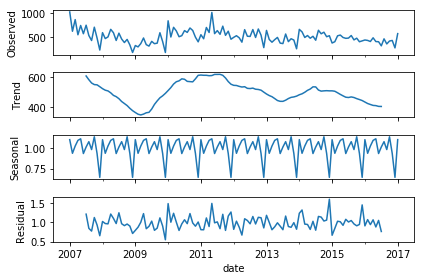

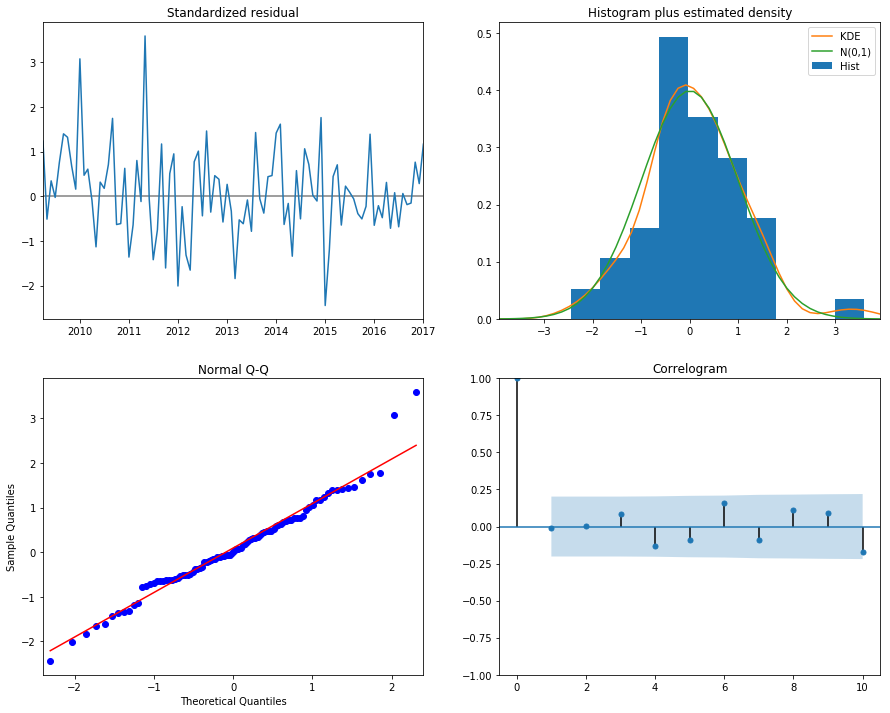

The Mean Squared Error of our forecasts is 16438.81
('The root of Mean Squared Error of our forecasts is :', 128.2139407110637)


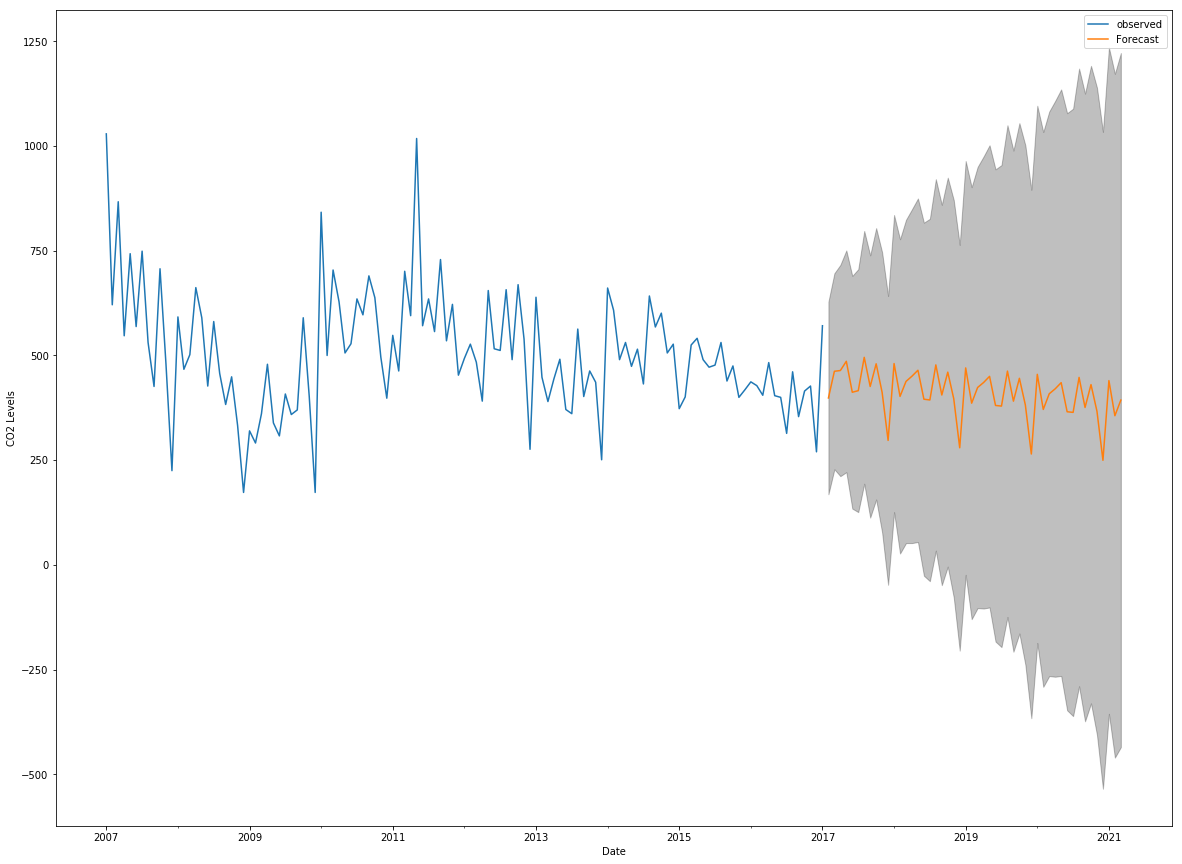

('the prediction for', 'Citroen')
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2024      0.147     -1.380      0.168      -0.490       0.085
ma.L1         -0.5399      0.130     -4.147      0.000      -0.795      -0.285
ar.S.L12      -0.0685      0.075     -0.920      0.358      -0.215       0.077
ma.S.L12      -1.0002    232.601     -0.004      0.997    -456.890     454.889
sigma2      2344.4139   5.46e+05      0.004      0.997   -1.07e+06    1.07e+06


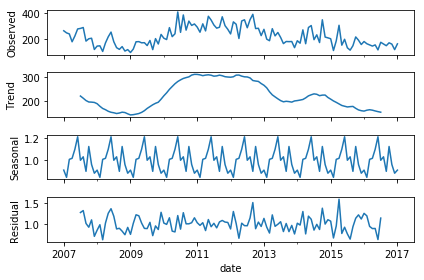

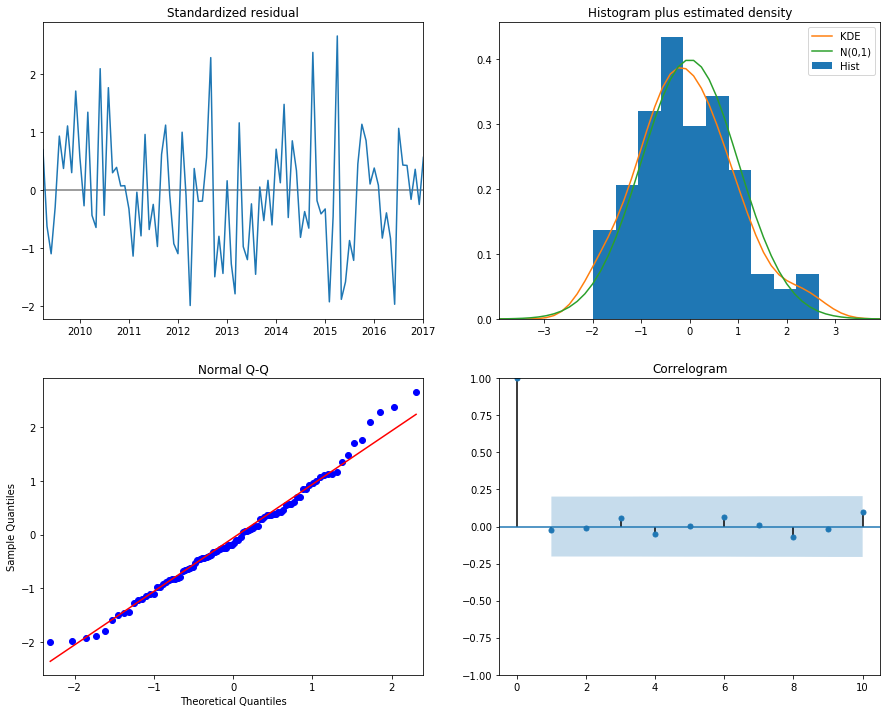

The Mean Squared Error of our forecasts is 3180.12
('The root of Mean Squared Error of our forecasts is :', 56.392581520512955)


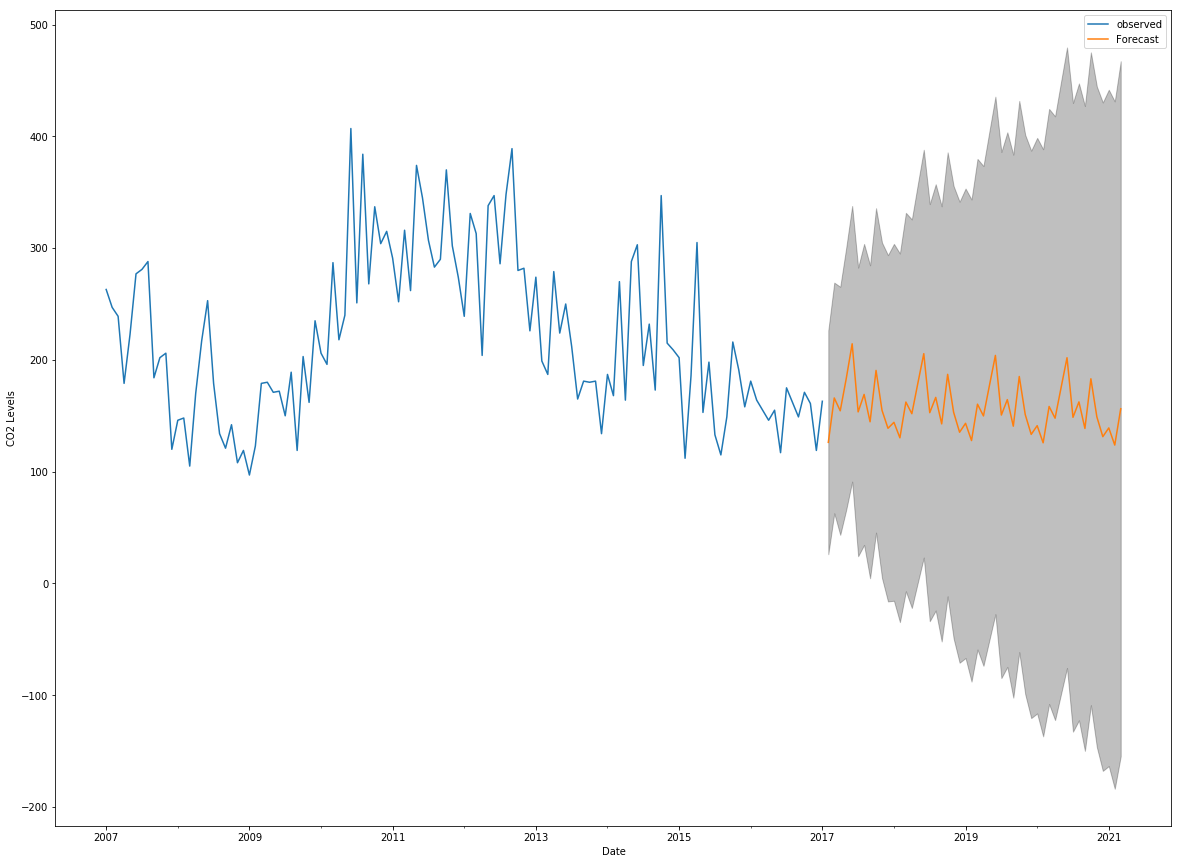

('the prediction for', 'Audi')
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0473      0.166     -0.284      0.776      -0.374       0.279
ma.L1         -0.7489      0.112     -6.666      0.000      -0.969      -0.529
ar.S.L12      -0.0104      0.111     -0.094      0.925      -0.229       0.208
ma.S.L12      -1.0000      0.126     -7.935      0.000      -1.247      -0.753
sigma2      8414.0955    1.5e-05   5.62e+08      0.000    8414.095    8414.096


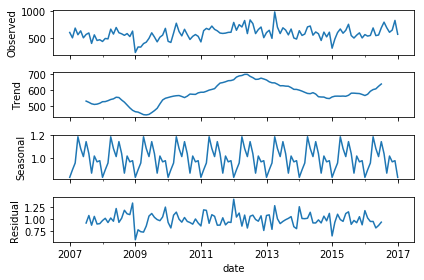

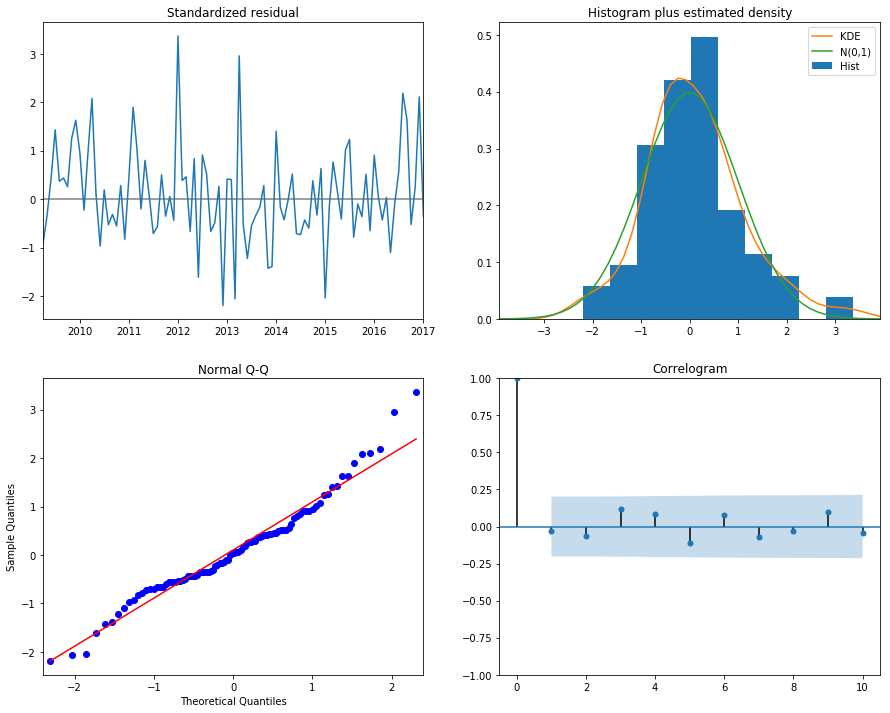

The Mean Squared Error of our forecasts is 13740.23
('The root of Mean Squared Error of our forecasts is :', 117.21872039563436)


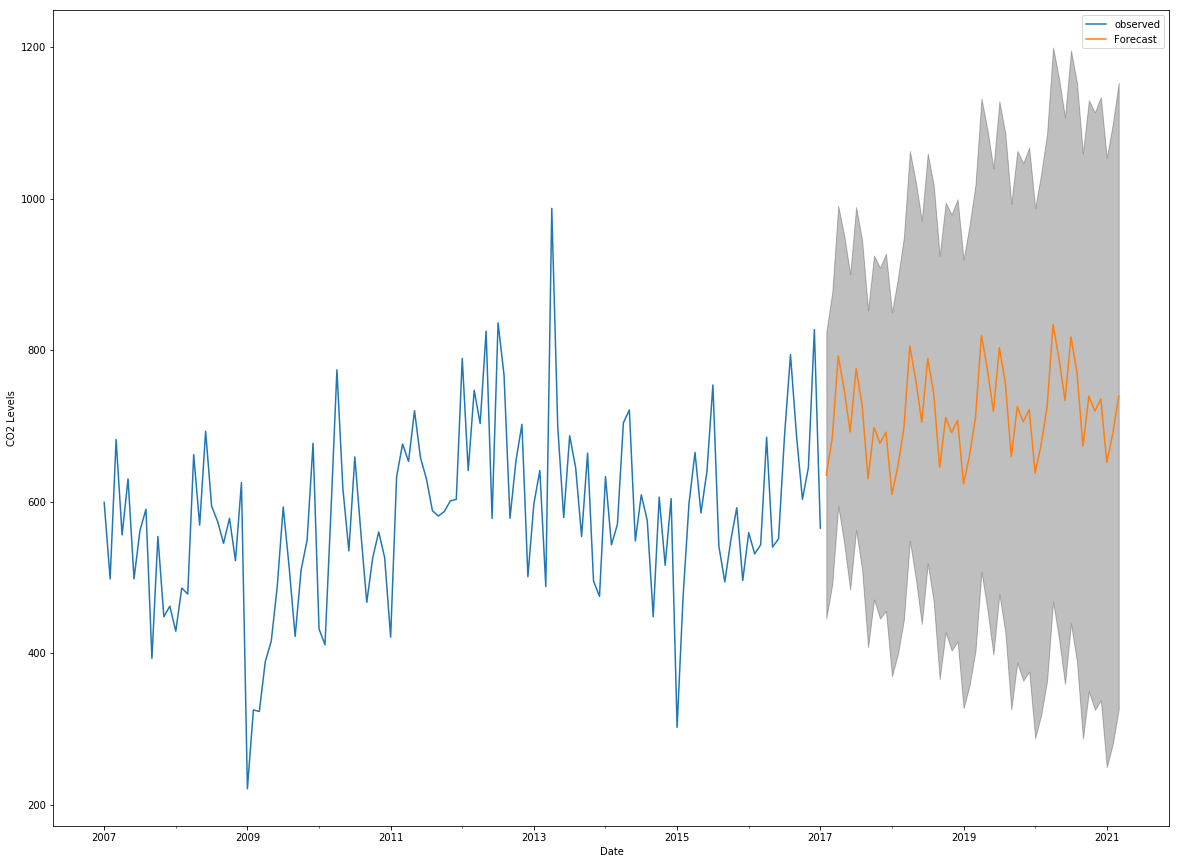

('the prediction for', 'Subaru')
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0119      0.120      0.099      0.921      -0.223       0.247
ma.L1         -0.6639      0.134     -4.959      0.000      -0.926      -0.401
ar.S.L12      -0.4006      0.296     -1.355      0.175      -0.980       0.179
ma.S.L12      -0.0617      0.315     -0.196      0.844      -0.678       0.555
sigma2      6644.5220    703.038      9.451      0.000    5266.593    8022.451


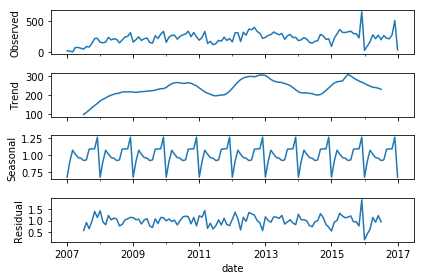

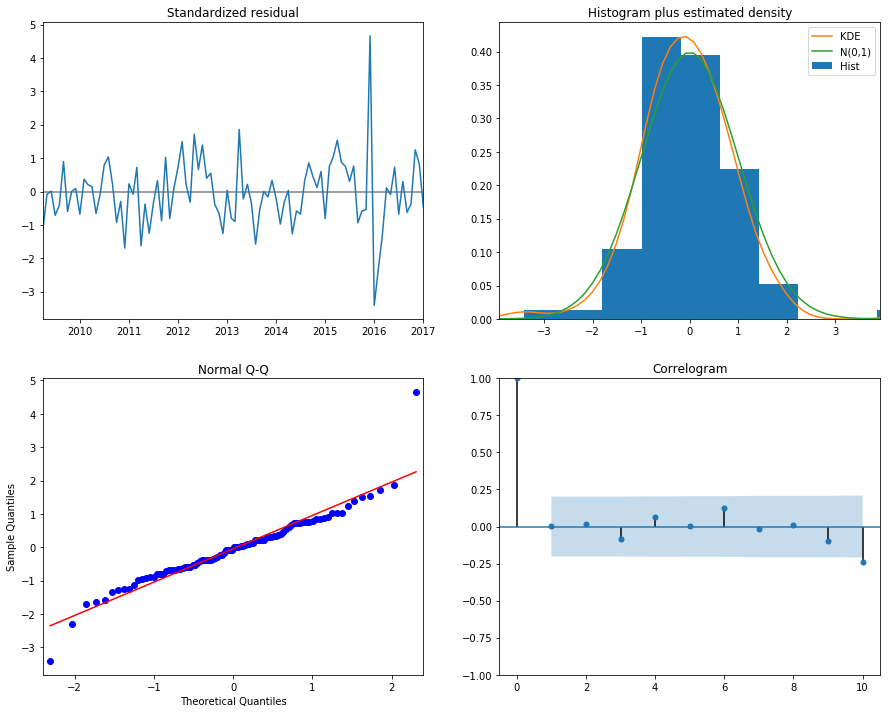

The Mean Squared Error of our forecasts is 6117.64
('The root of Mean Squared Error of our forecasts is :', 78.21534270509758)


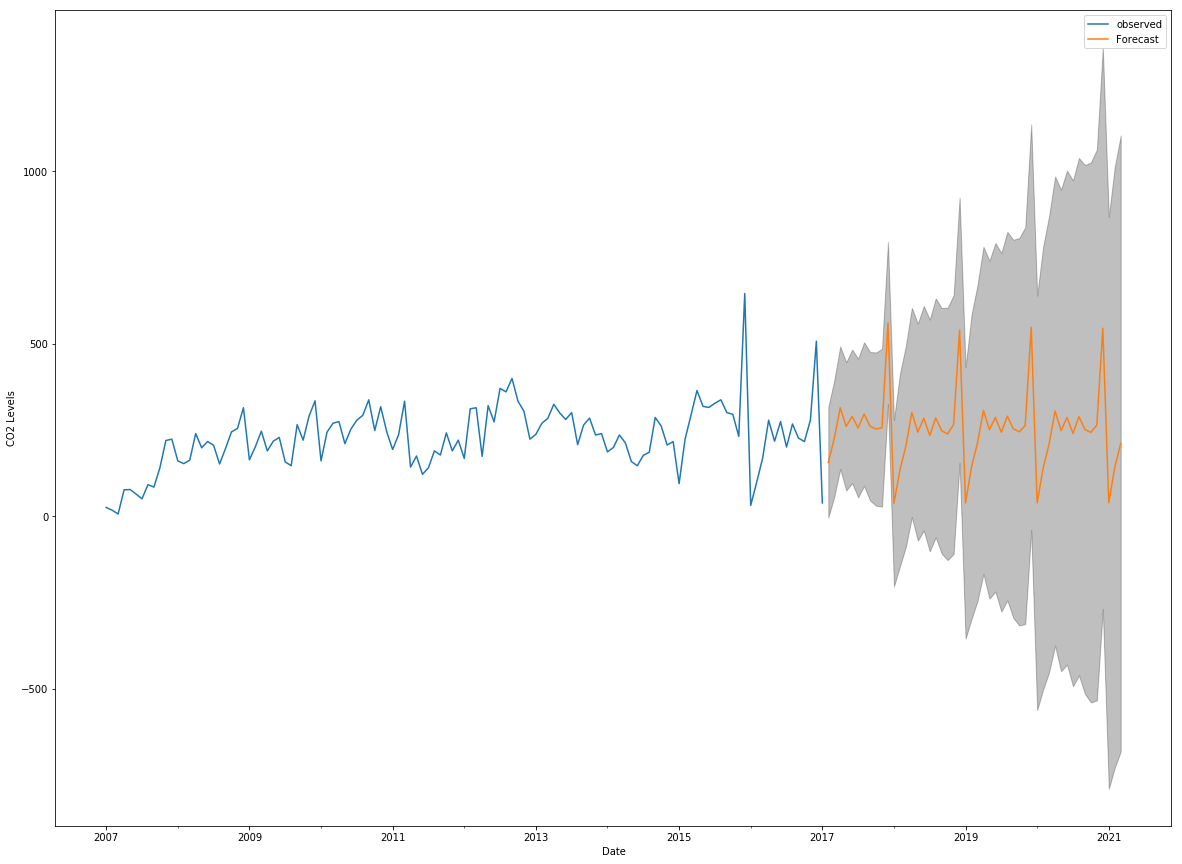

('the prediction for', 'Alfa Romeo')
('the prediction for', 'Porsche')
('the prediction for', 'Jaguar')
('the prediction for', 'Smart')
('the prediction for', 'Jeep')
('the prediction for', 'Chevrolet')
('the prediction for', 'Ssangyong')
('the prediction for', 'Tesla')
('the prediction for', 'Saab')
('the prediction for', 'Daihatsu')
('the prediction for', 'Dacia')
('the prediction for', 'Nilsson')
('the prediction for', 'Think')
('the prediction for', 'Dodge')
('the prediction for', 'Chrysler')
('the prediction for', 'Morgan')
('the prediction for', 'Cadillac')
('the prediction for', 'Iveco')
('the prediction for', 'Aston Martin')
('the prediction for', 'Maserati')
('the prediction for', 'Ferrari')
('the prediction for', 'Lancia')
('the prediction for', 'Isuzu')
('the prediction for', 'DS')
('the prediction for', 'Bentley')
('the prediction for', 'Chevrolet US')
('the prediction for', 'Seat')
('the prediction for', 'Mia')
('the prediction for', 'Fisker')
('the prediction for', 'Lotus

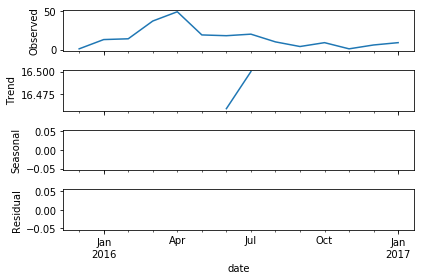

In [43]:
import matplotlib.pyplot as plt
for x in makes :
    try:
        import warnings
        print('the prediction for',x)
        dfx = df[df.Make.str.contains(x)]
        dfx = dfx.drop('Make',axis =1)
        dfx = dfx.groupby(['date'])['Quantity'].sum()
        from plotly.plotly import plot_mpl
        from statsmodels.tsa.seasonal import seasonal_decompose
        result = seasonal_decompose(dfx, model='multiplicative')
        fig = result.plot()
        fig.show()
        mod = sm.tsa.statespace.SARIMAX(dfx,
                                    order=(1, 1, 1),
                                    seasonal_order=(1, 1, 1, 12),
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)

        results = mod.fit()
        print(results.summary().tables[1])
        results.plot_diagnostics(figsize=(15, 12))
        plt.show()
        pred = results.get_prediction(start=pd.to_datetime('2008-01-01'))
        pred_ci = pred.conf_int()
        y_forecasted = pred.predicted_mean
        y_truth = dfx['2008-01-01':]
        mse = ((y_forecasted - y_truth) ** 2).mean()
        print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
        print('The root of Mean Squared Error of our forecasts is :',math.sqrt(mse))
        pred_uc = results.get_forecast(steps=50)
        pred_ci = pred_uc.conf_int()
        ax = dfx.plot(label='observed', figsize=(20, 15))
        pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
        ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.25)
        ax.set_xlabel('Date')
        ax.set_ylabel('CO2 Levels')
        plt.legend()
        plt.show()
    except ValueError, e:
        continue
    except IndexError, i:
        continue
    except TypeError, t:
        continue